# **CAPSTONE PROJECT 3- Cardiovascular Risk Prediction**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [1]:
#libraries used in this project
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt#For visualizations
from sklearn.preprocessing import StandardScaler, MinMaxScaler#for Scalling feature datas
from sklearn.impute import KNNImputer, SimpleImputer#for outlier handling
# Importing libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split#For train and test dataset splitting
from sklearn.feature_selection import mutual_info_classif#For information gain analysis
from imblearn.over_sampling import SMOTE#for oversampling in case of class imbalance
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting drive to google account
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the dataset to dataframe named 'data_df'
data_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 3- Cardiovascular Risk Prediction/data_cardiovascular_risk.csv',encoding = 'unicode_escape')

# Data preprocessing

In [4]:
data_df.head()#how does the data set looklike...?

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
data_df=data_df.drop(columns=['id'])#'id' feature has no relevence in this analysis so droping it from further analysis

In [6]:
#Checking dataset info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


The dataset contains 7 categorical features namely 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp' & 'diabetes'.

The dataset contains 8 numerical features namely 'age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' & 'glucose'.

Here the target feature is 'TenYearCHD'

In [7]:
#Creating two variables for categorical and numerical feature for further analysis
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_features = ['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [8]:
#Running describe function
data_df[num_features].describe()

,age,totChol,cigsPerDay,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3352.000000,3368.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000
mean,49.542183,237.074284,9.069477,132.60118,82.883038,25.794964,75.977279,82.086520
std,8.592878,45.247430,11.879078,22.29203,12.023581,4.115449,11.971868,24.244753
min,32.000000,107.000000,0.000000,83.50000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,206.000000,0.000000,117.00000,74.500000,23.020000,68.000000,71.000000
50%,49.000000,234.000000,0.000000,128.50000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,264.000000,20.000000,144.00000,90.000000,28.040000,83.000000,87.000000
max,70.000000,696.000000,70.000000,295.00000,142.500000,56.800000,143.000000,394.000000


In [9]:
#label Encoding categorical features for further better analysis
data_df['sex']=np.where(data_df['sex']=='M',1,0)
data_df['is_smoking']=np.where(data_df['is_smoking']=='YES',1,0)

## NaN value handling

In [10]:
#Checking Nan Value count
data_df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

For Nan value handling, simple imputer("most_frequent") for categorical features and Knn imputer for numerical features is implemented.

In [11]:
#Implementing simple imputer on categorical features
simp_imputer = SimpleImputer(strategy="most_frequent")
simp_imputer.fit(data_df[cat_features])
data_df[cat_features]= simp_imputer.transform(data_df[cat_features])

In [12]:
#Implementing Knn imputer on numerical features
knn_imputer= KNNImputer(n_neighbors=5)
knn_imputer.fit(data_df[num_features])
data_df[num_features]= knn_imputer.transform(data_df[num_features])

## Distribution and outlier analysis

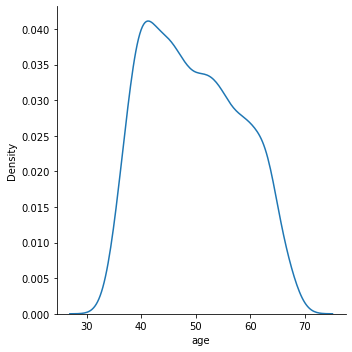

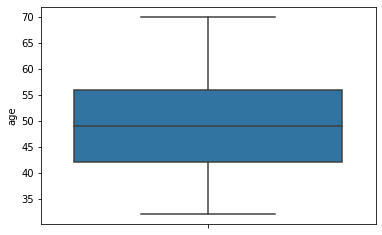

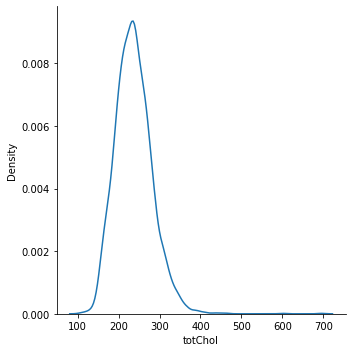

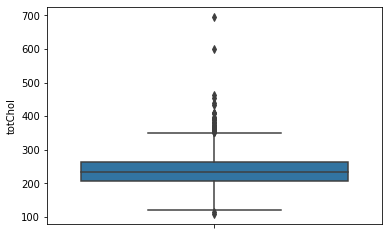

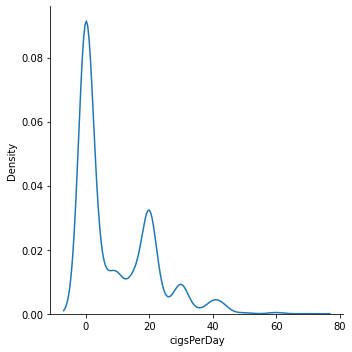

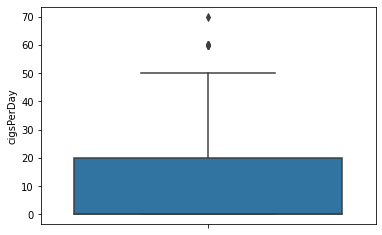

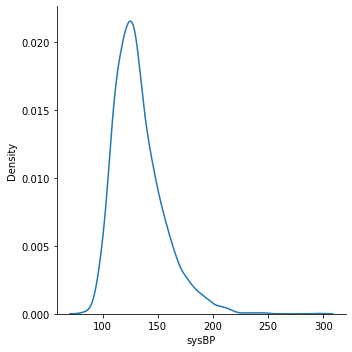

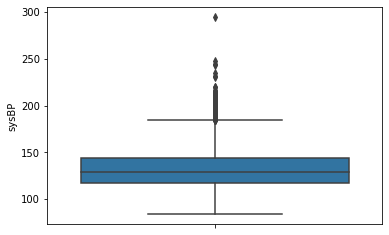

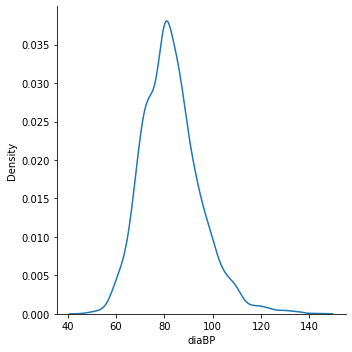

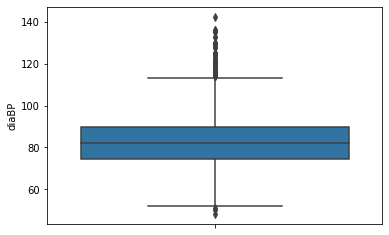

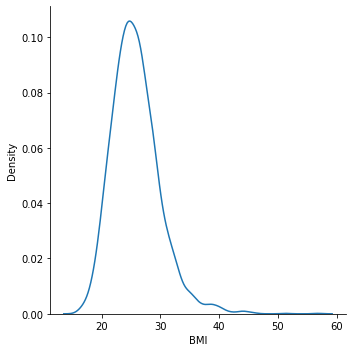

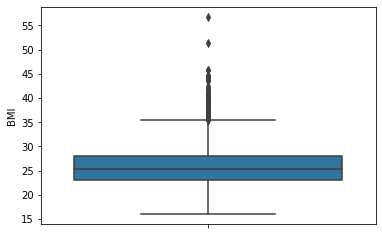

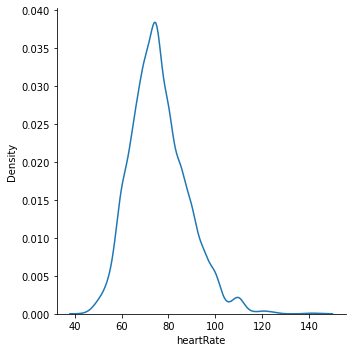

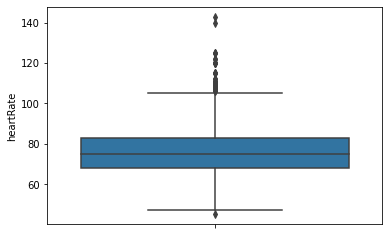

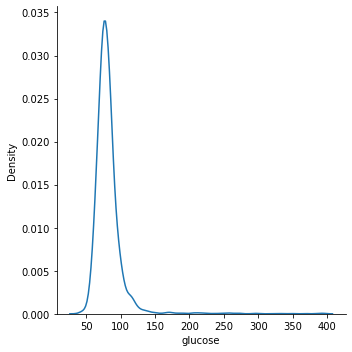

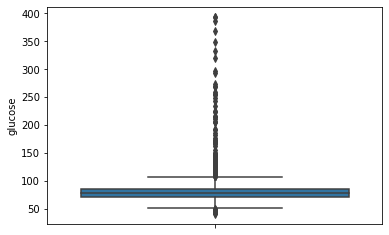

In [13]:
#Disrtribution and outlier analysis
for v in num_features:
   sns.displot(data=data_df, x=v, kind="kde")#displot for distribution analysis
   plt.show()

   sns.boxplot(data=data_df,y=v)#boxplot for outlier analysis
   plt.show()

REMARKS:

1.   No outliers and good distribution is observed in age feature.
2.   Outliers are observed in 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' and 'glucose' features.

So, in order to handle those outliers IQR method is implemented.


In [14]:
#Implementing IQR method 
for v in ['totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate']:
   vals = data_df[v].quantile([0.25,0.75])
   iqr = vals.values[1] - vals.values[0]
   min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
   #Assigning those outliers with min and max values
   data_df[v] = data_df[v].apply(lambda x : min_lim if x < min_lim else x)
   data_df[v] = data_df[v].apply(lambda x : max_lim if x > max_lim else x)

Since 'glucose' feature is having very high outliers, Iam assigning max limit as 145(because in medical terms glucose level above 145 is considered to be high)


In [15]:
#Implementing IQR method 
vals = data_df.glucose.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, 145

#Assigning those outliers with min and max values
data_df['glucose'] = data_df['glucose'].apply(lambda x : min_lim if x < min_lim else x)
data_df['glucose'] = data_df['glucose'].apply(lambda x : max_lim if x > max_lim else x)

0.25    72.0
0.75    86.0
Name: glucose, dtype: float64


# Exploratory Data Analysis

In exploratory data analysis the approach used is ,


*   All categorical features is analysed w.r.t each other and the target variable
*   All numerical features is analysed w.r.t each other ,target feature and categorical features 





## Analysing each categorical feature with respect to each other

  To understand data concerning categorical features, I used count plot and barplot(to understand percentage distribution) and analyzed each feature with respect to each other.

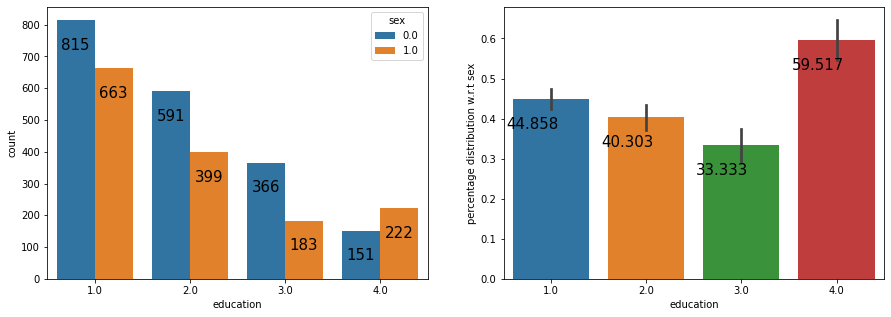

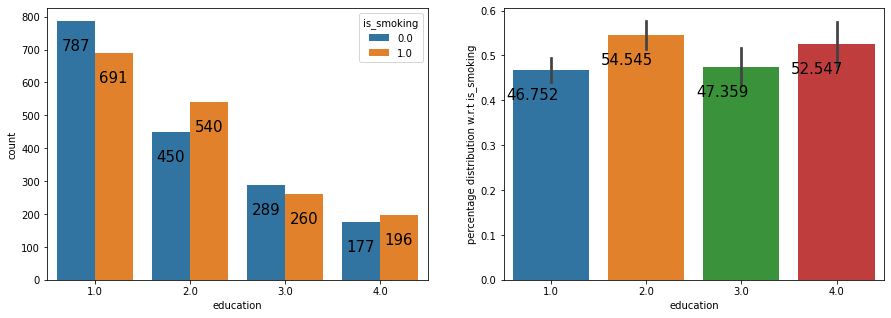

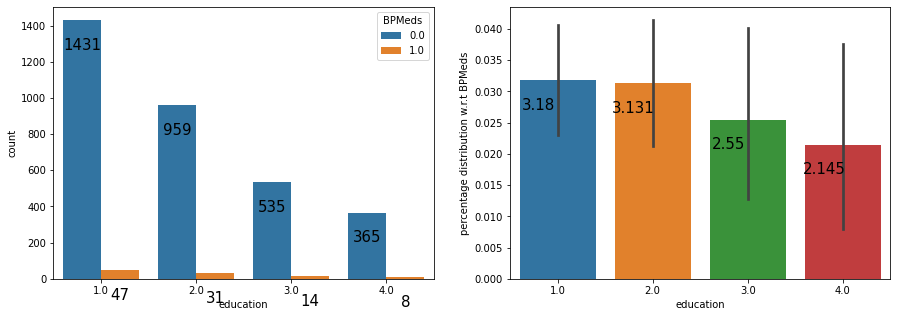

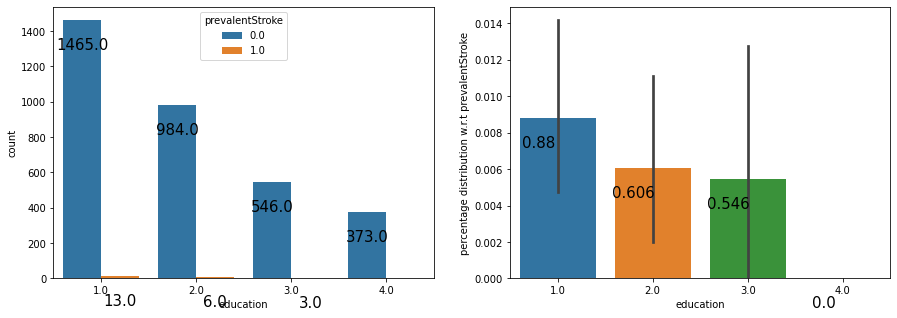

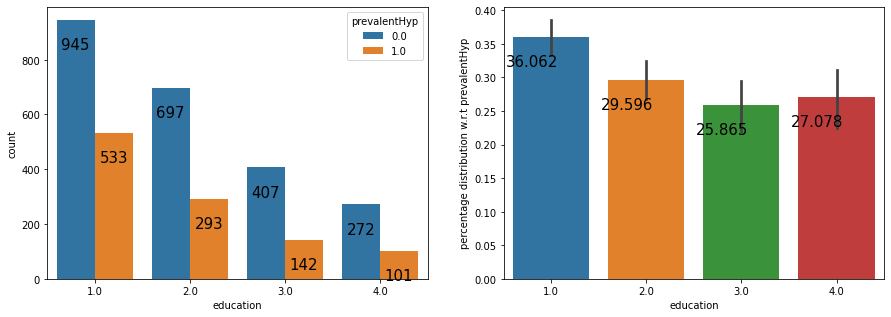

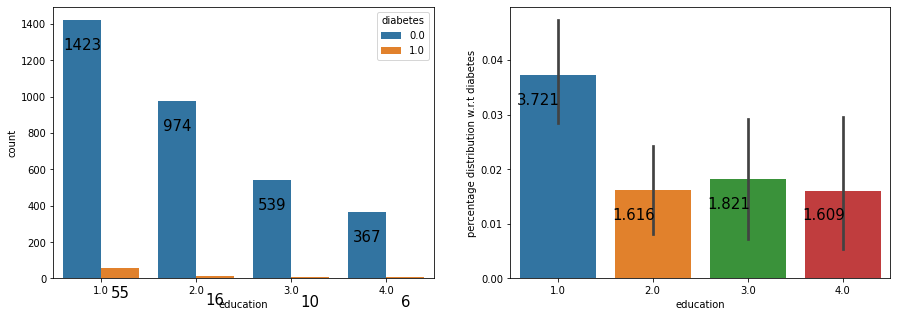

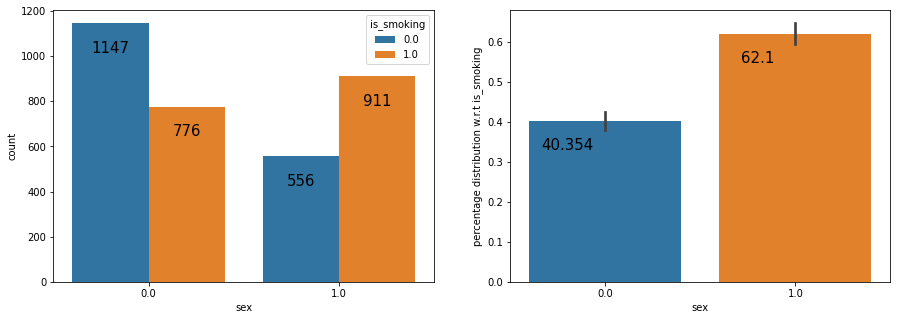

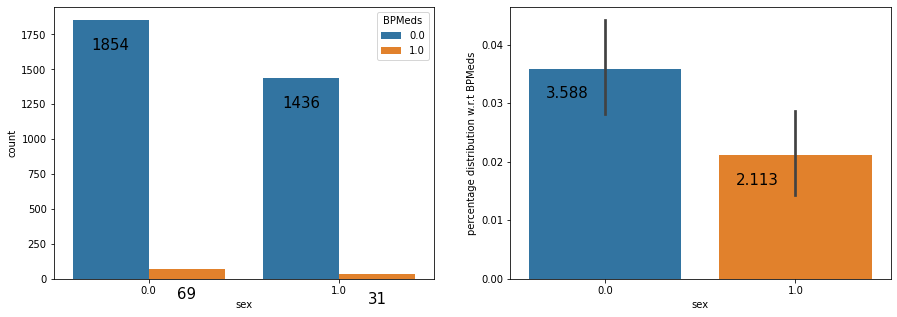

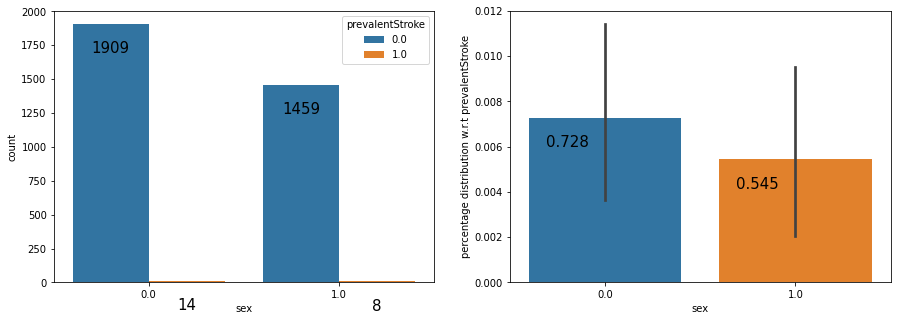

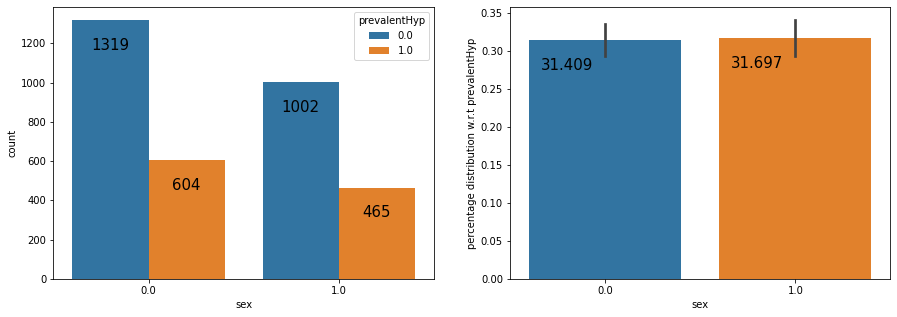

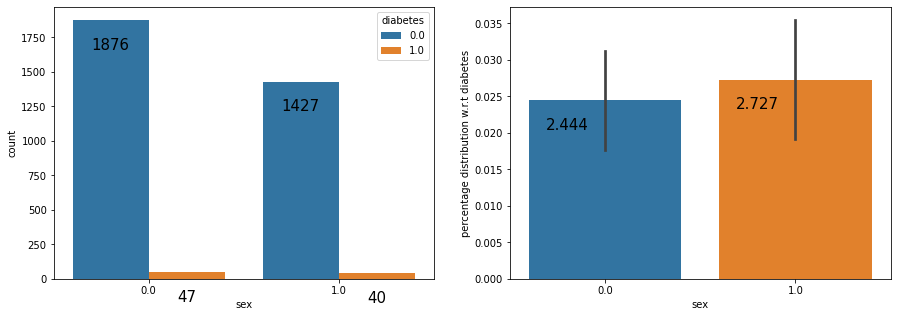

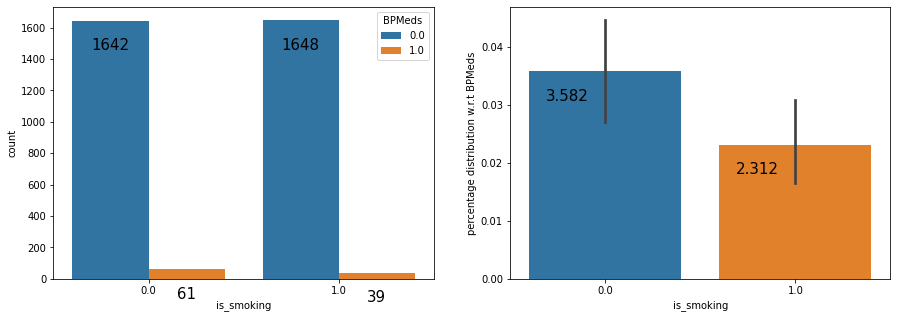

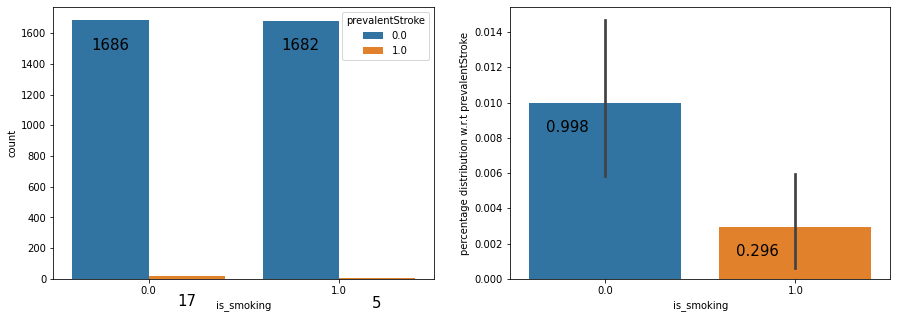

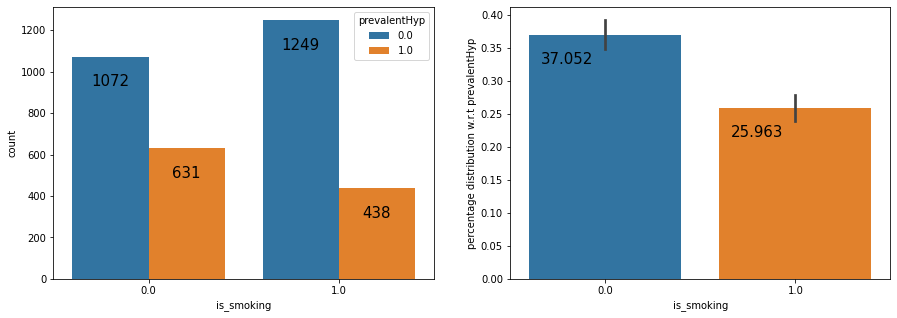

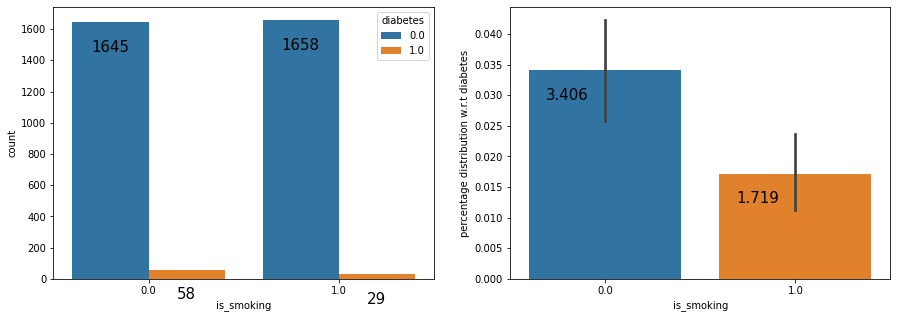

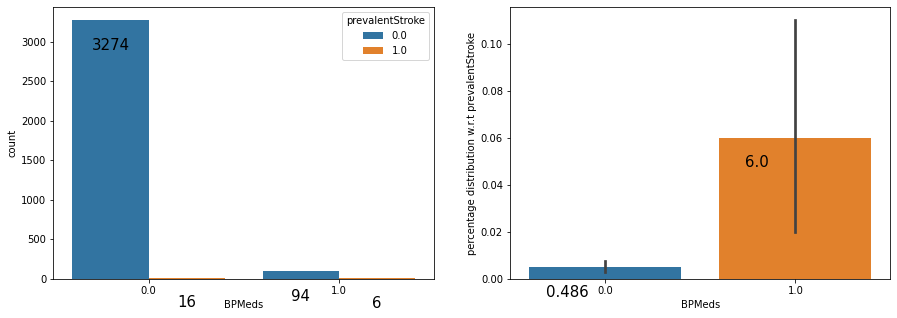

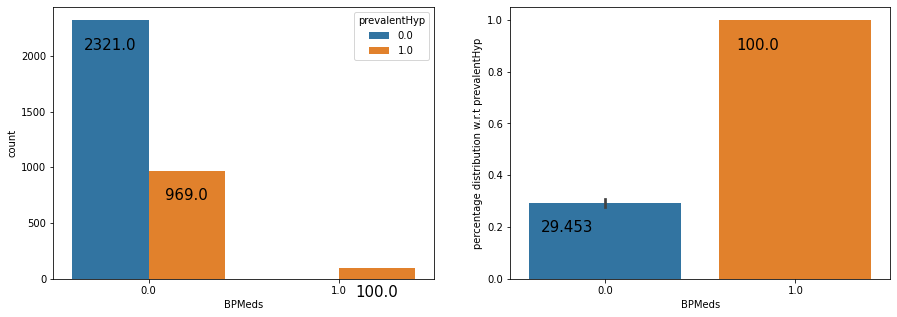

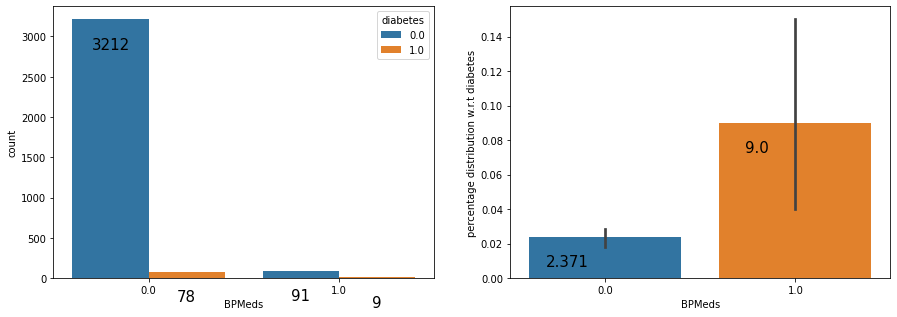

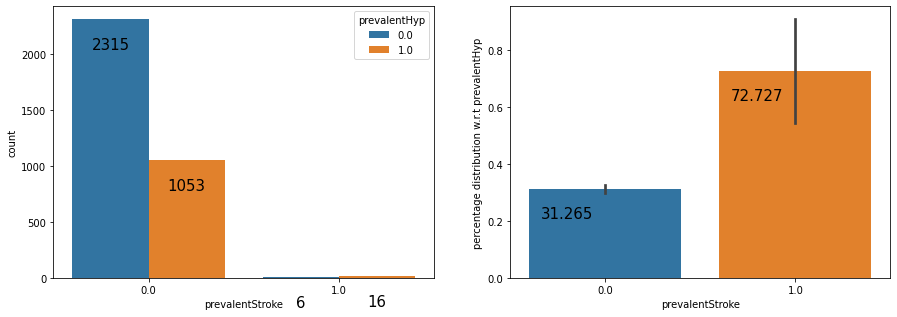

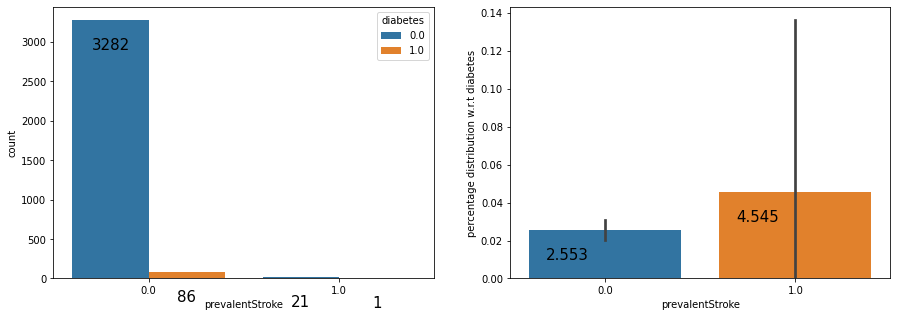

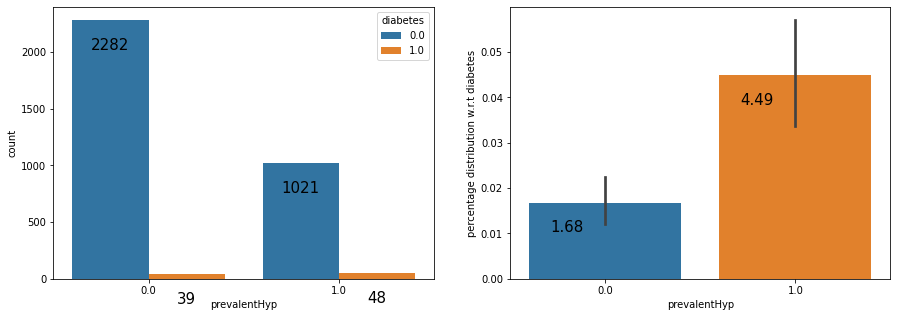

In [16]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
temp_list=['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']#creating a temp_list of categorical features to use in below coding
i=0
for v in ['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  i=i+1
  for z in temp_list[i:7]:#creating for loop using temp list of categorical features to  avoid repeatation of ploting
      fig, axes = plt.subplots(1,2,figsize=(15,5))
      ch=sns.countplot(x=v,hue=z,data=data_df, ax=axes[0])#countplot
      for p in ch.patches:
           ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
      vh=sns.barplot(v,z, data = data_df, ax=axes[1])#barplot
      vh.set(ylabel=f'percentage distribution w.r.t {z}')
      for p in vh.patches:
           vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)


**REMARKS:**

below mentioned are the key insights after analysising categorical features,

*   People attaining education 1 is high followed by 2,3 and 4
*   Males in education 1, 2 and 3 are comparatively less than females, but in the case of education-4 males are comparatively high than males.
*   Around 50% of people in all education types tend to be smokers.
*   Around 30% of people in all education types tend to have hypertension.
*   Males have higher chance to be a smoker.
*   Non-smokers tend to have a bit higher chance(37%) of hypertension issues compared to smokers(25%).
*   People on bp medication tend to have hypertension issues as well.
*   People on bp medication tend to have a bit higher chance to be diabetic by 9%.
*   People with prevalent stroke tend to have a higher chance(72%) of hypertension issues.
*   People with prevalent hypertension tend to have a bit higher chance of being diabetic.









## Categorical features with respect to target feature

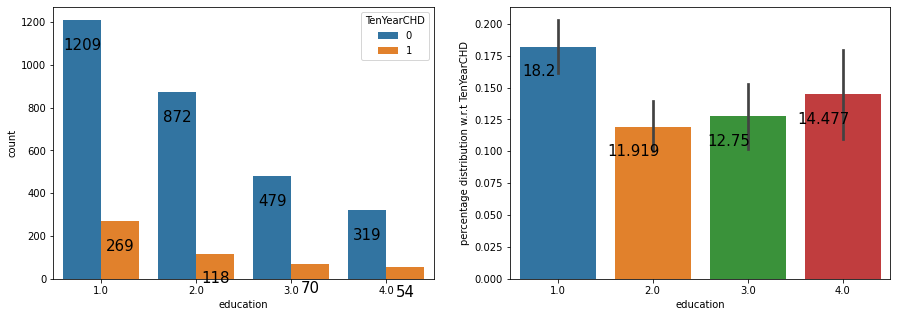

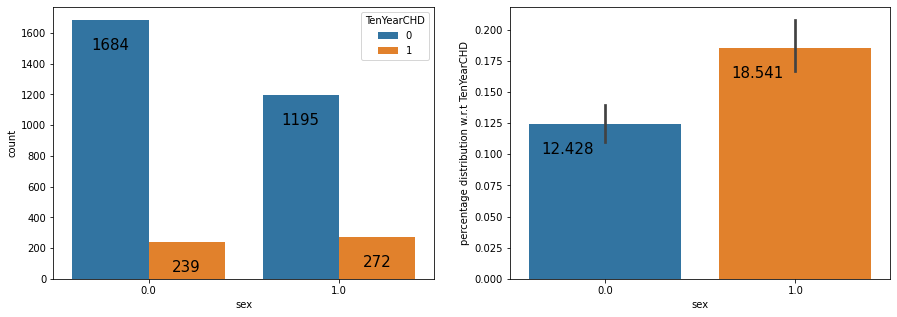

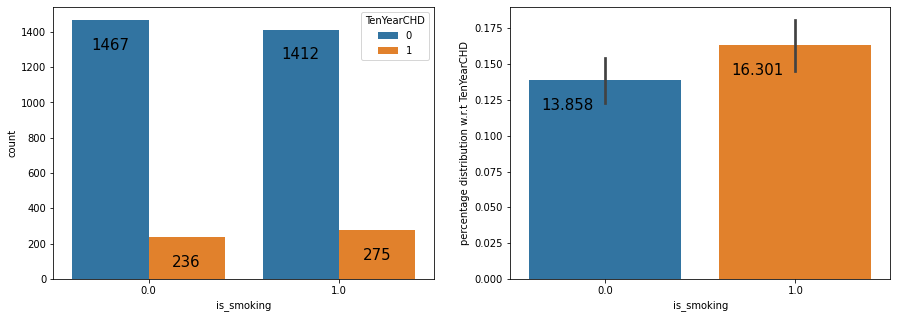

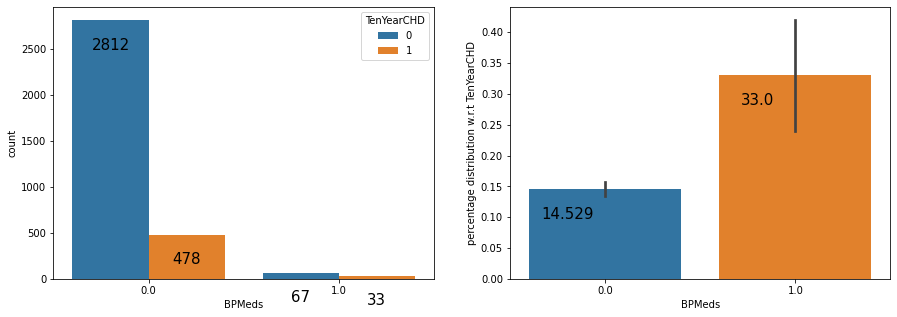

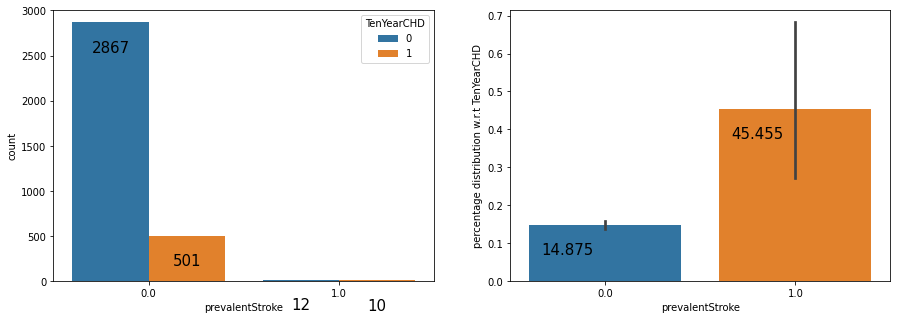

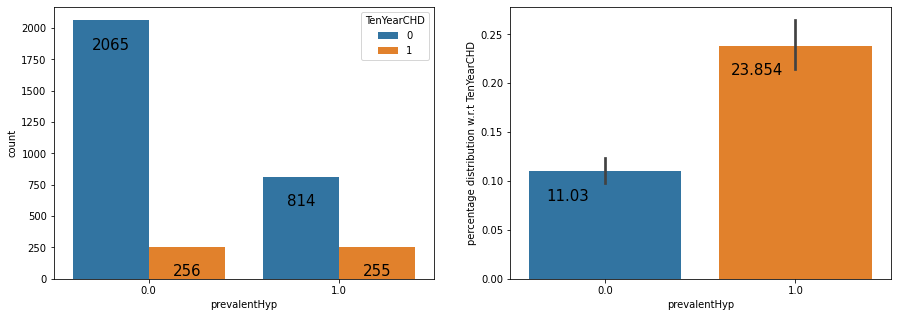

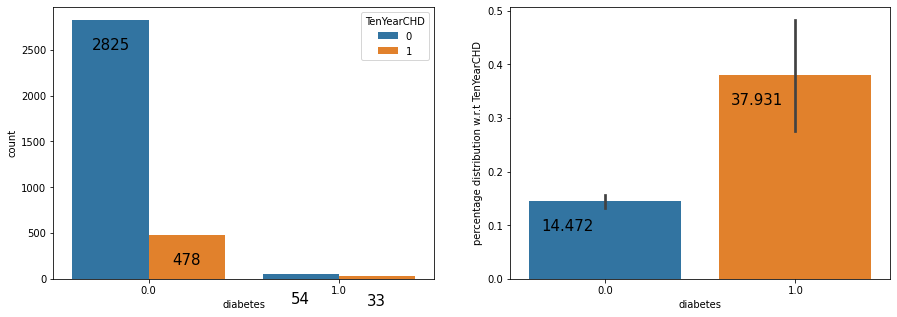

In [17]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
for v in cat_features:
   fig, axes = plt.subplots(1,2,figsize=(15,5))
   ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#countplot
   for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
   vh=sns.barplot(v, 'TenYearCHD', data = data_df, ax=axes[1])#barplot
   vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
   for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**REMARKS:**



*   Males have a bit higher chance of CHD (18.5%) compared to females (12.4%).
*   Smokers have a bit higher chance of CHD (16.3%) compared to females (13.8%).
*   People with BP medication, prevalent stroke, prevalent hypertension and/or diabetes have a higher chance of CHD compared to others.



## Analysing Numerical features with respect to categorical features

### Analysis with respect to age

**Analysising age feature with respect to other categorical features :**

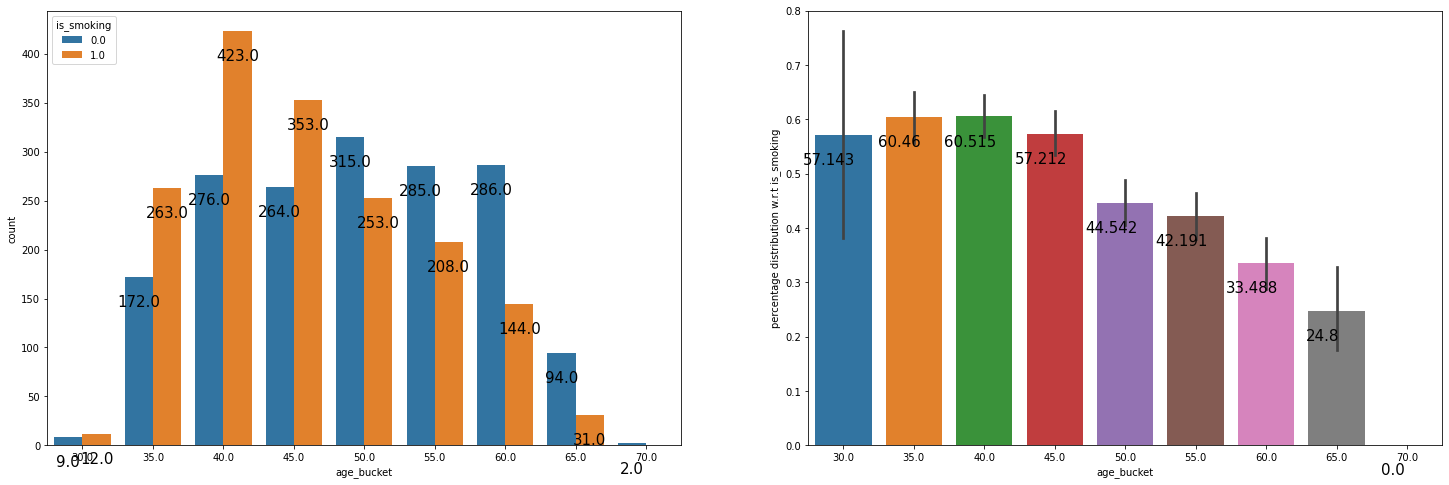

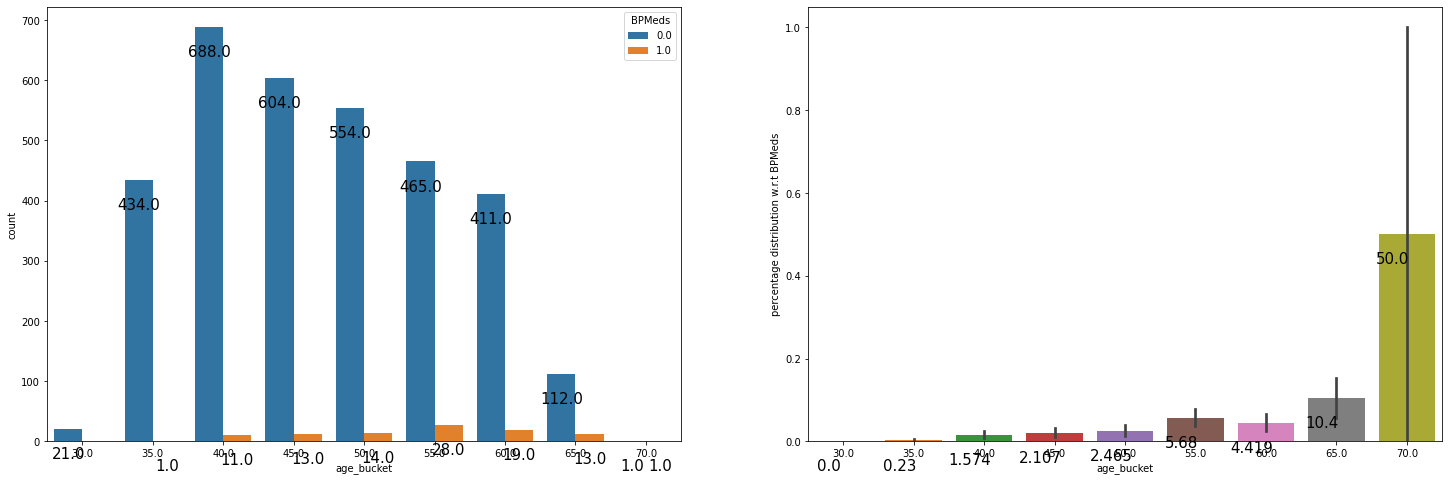

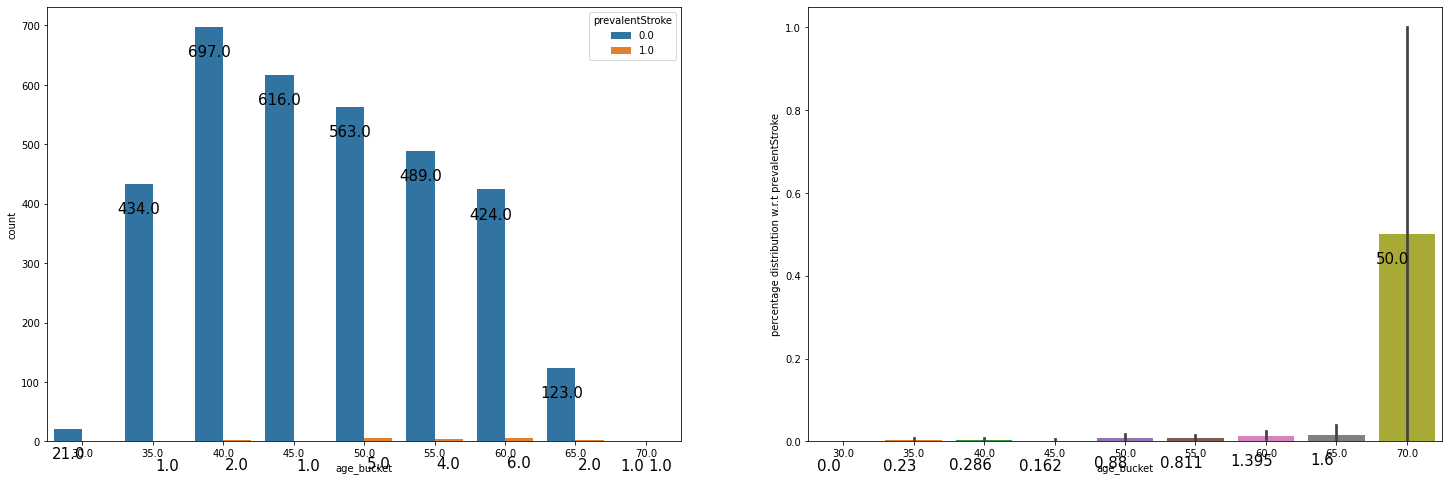

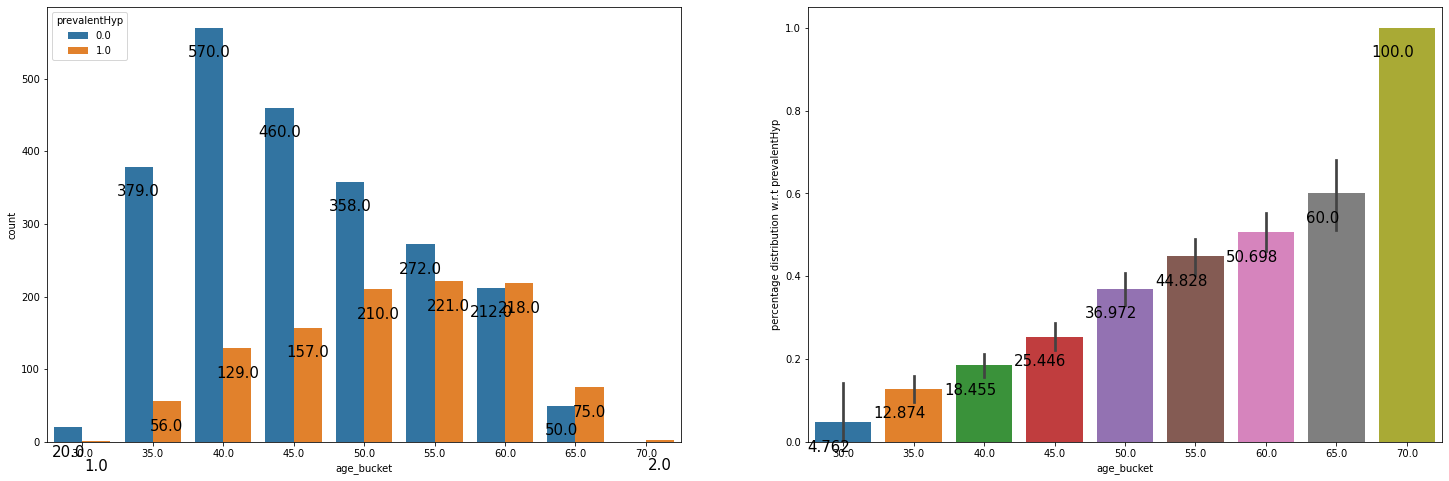

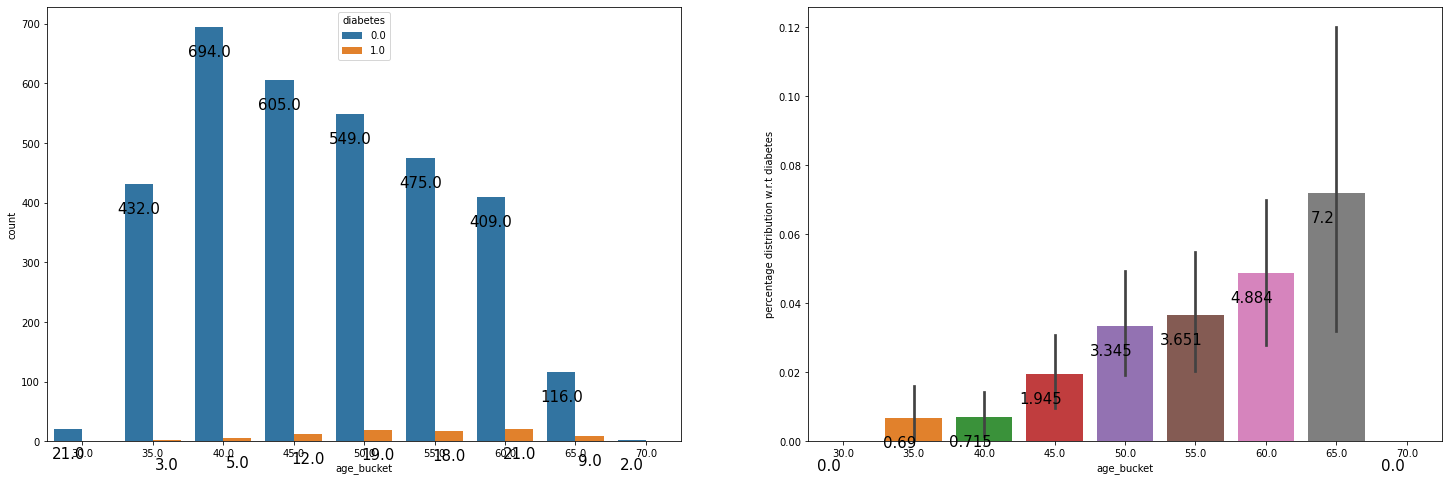

In [18]:
#For better further analysis binning is implemented on age feature
data_df['age_bucket'] = data_df['age'].apply(lambda x : 5*(x//5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='age_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('age_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Smoking habits tend to decrease with an increase in age.
*   Bp, hypertension and diabetes issues tend to increase with increases in age.



### Analysis with respect to totChol

**Analysising totChol feature with respect to other categorical features :**

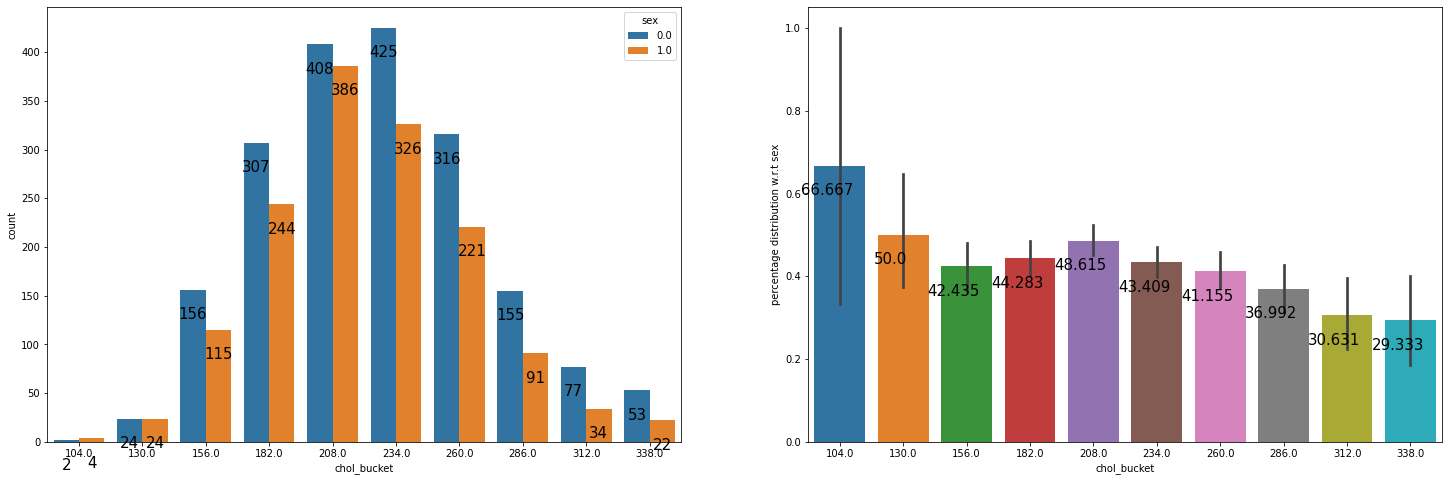

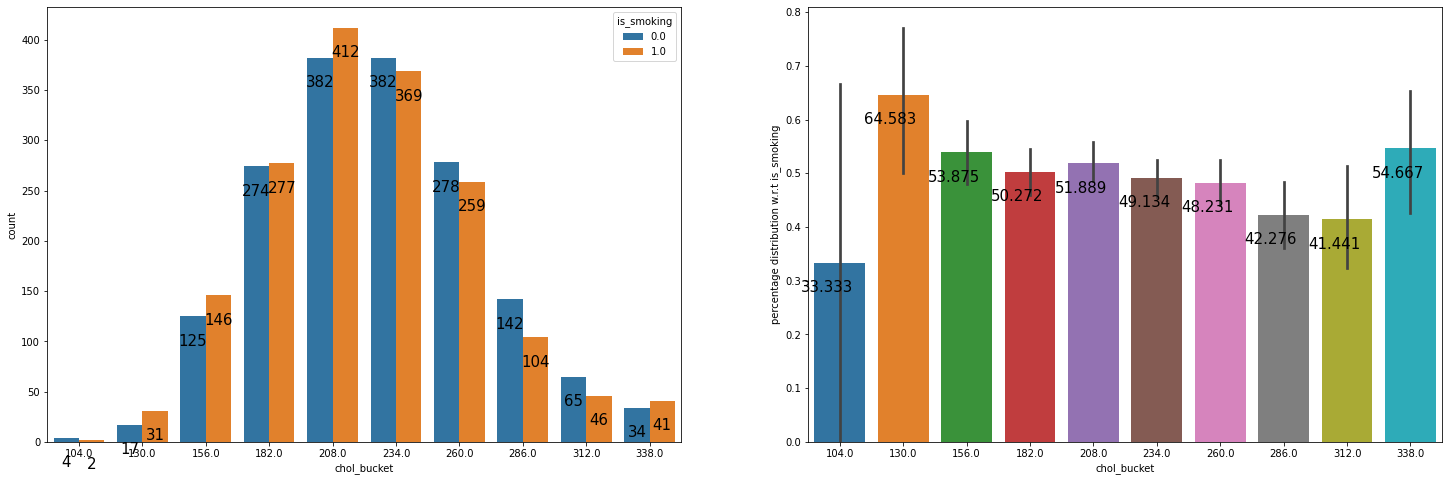

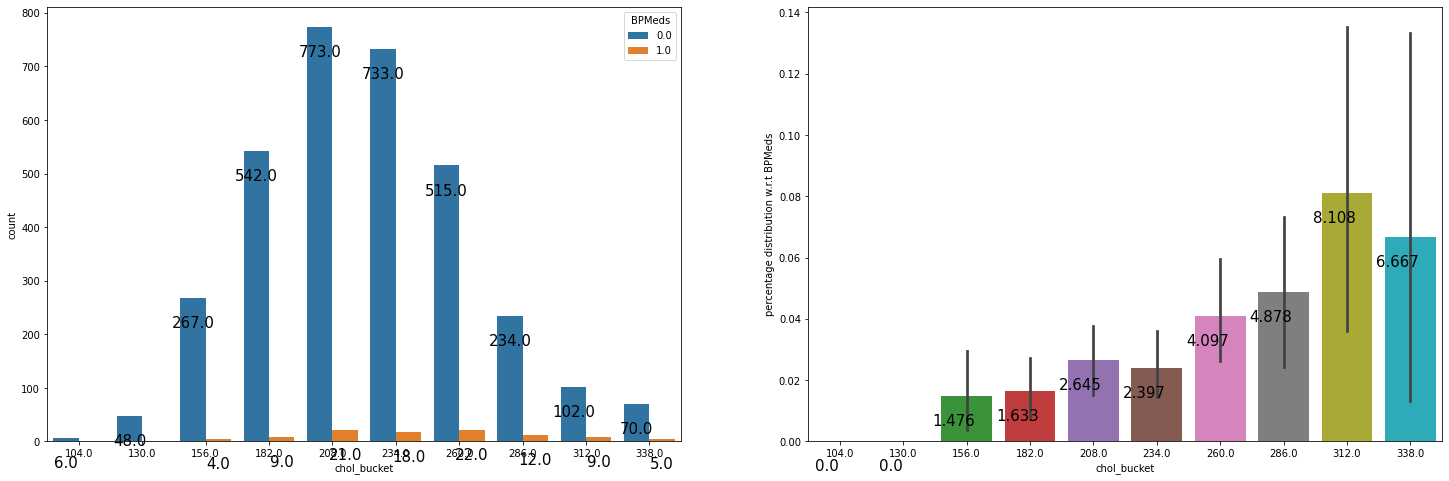

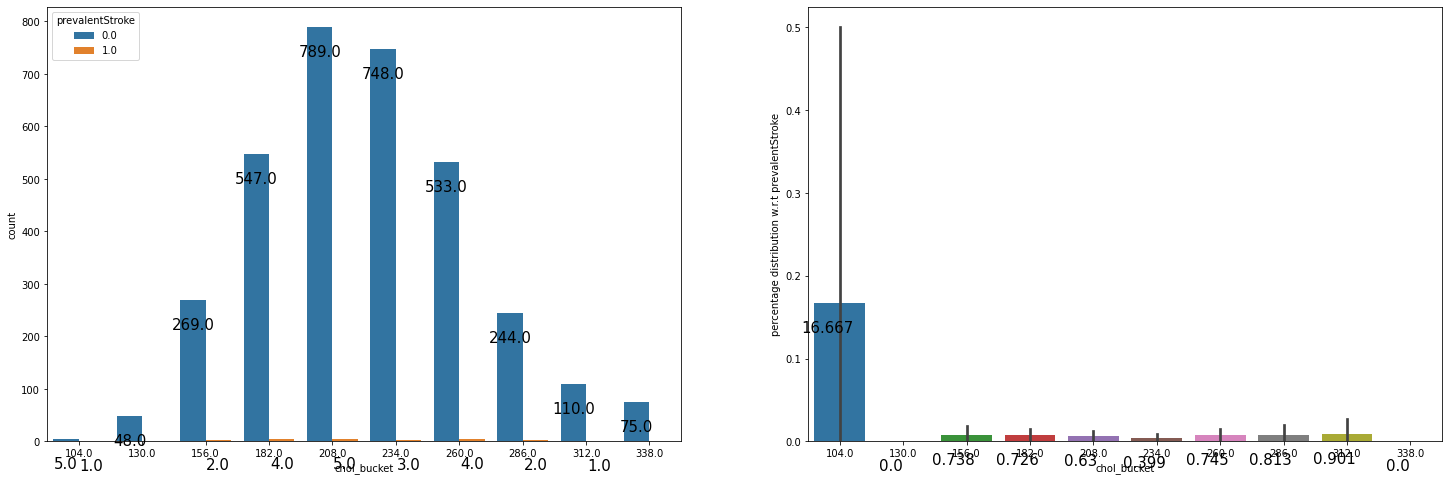

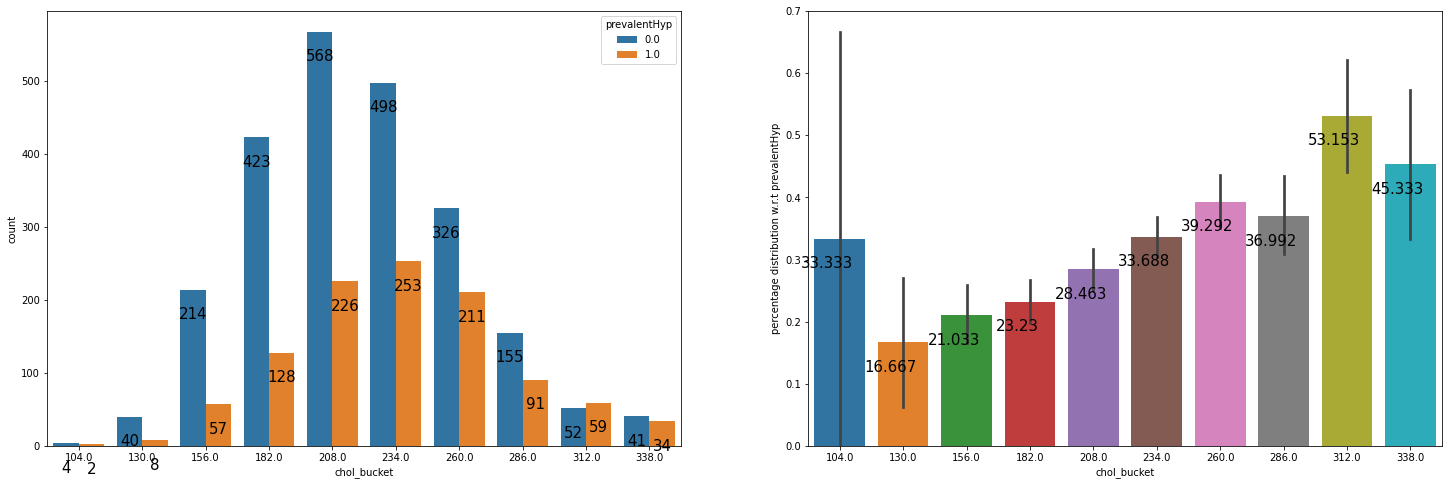

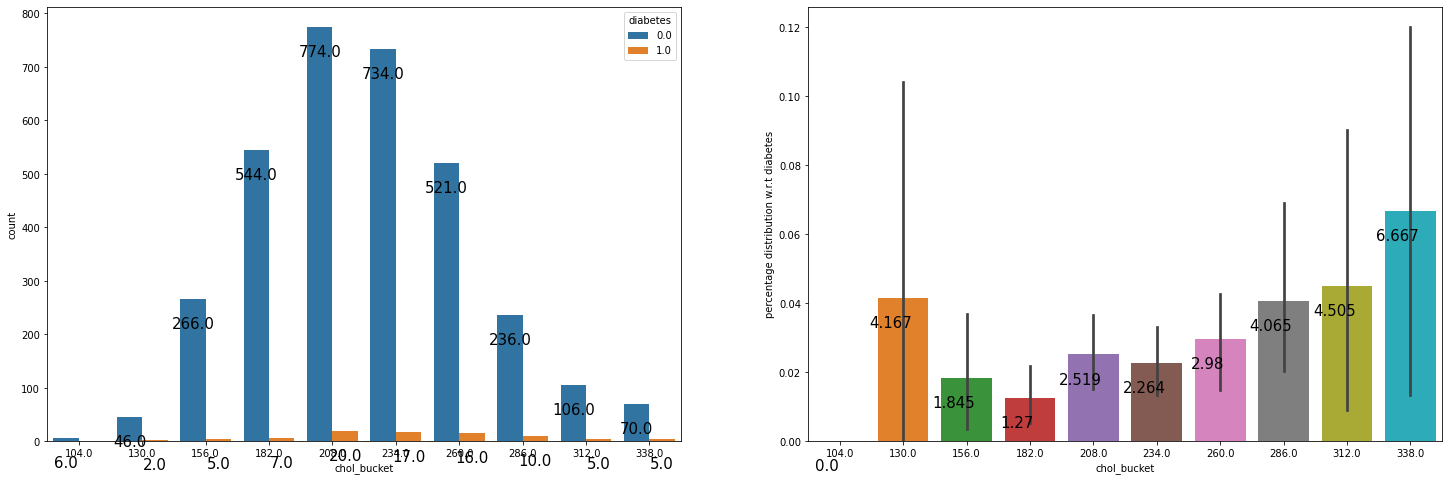

In [19]:
#For better further analysis binning is implemented on age feature
data_df['chol_bucket'] = data_df['totChol'].apply(lambda x : 26*(x//26))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='chol_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

  vh=sns.barplot('chol_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Females tend to have higher cholesterol levels compared to males.
*   Bp and hypertension issues tend to increase with an increase in cholesterol levels



### **Analysis with respect to cigsPerDay**

**Analysising cigsPerDay feature with respect to other categorical features :**

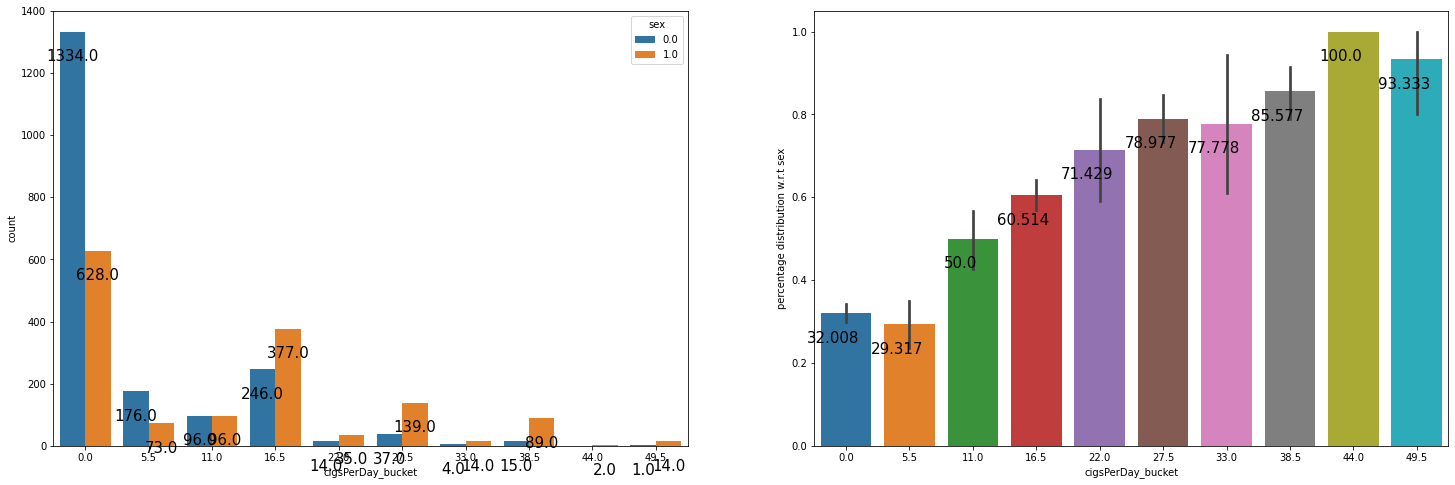

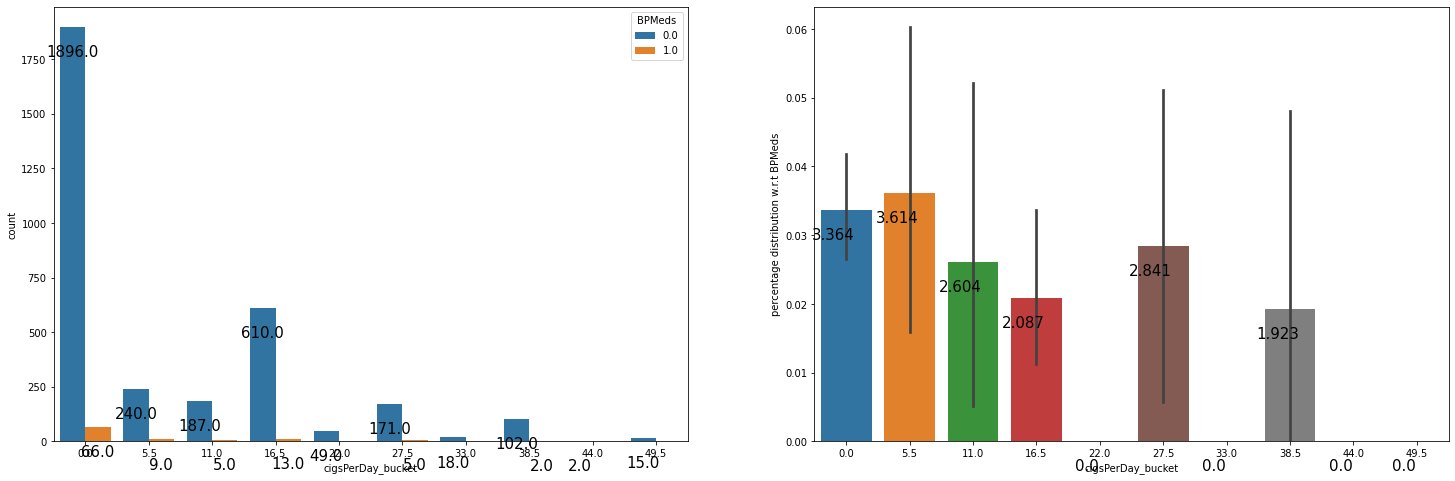

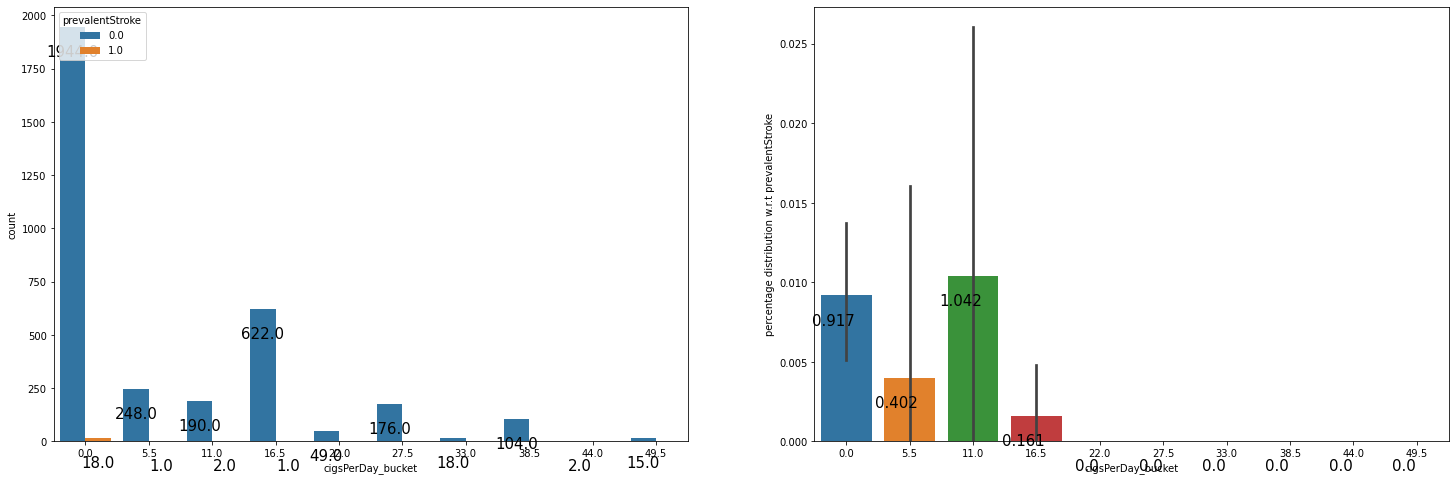

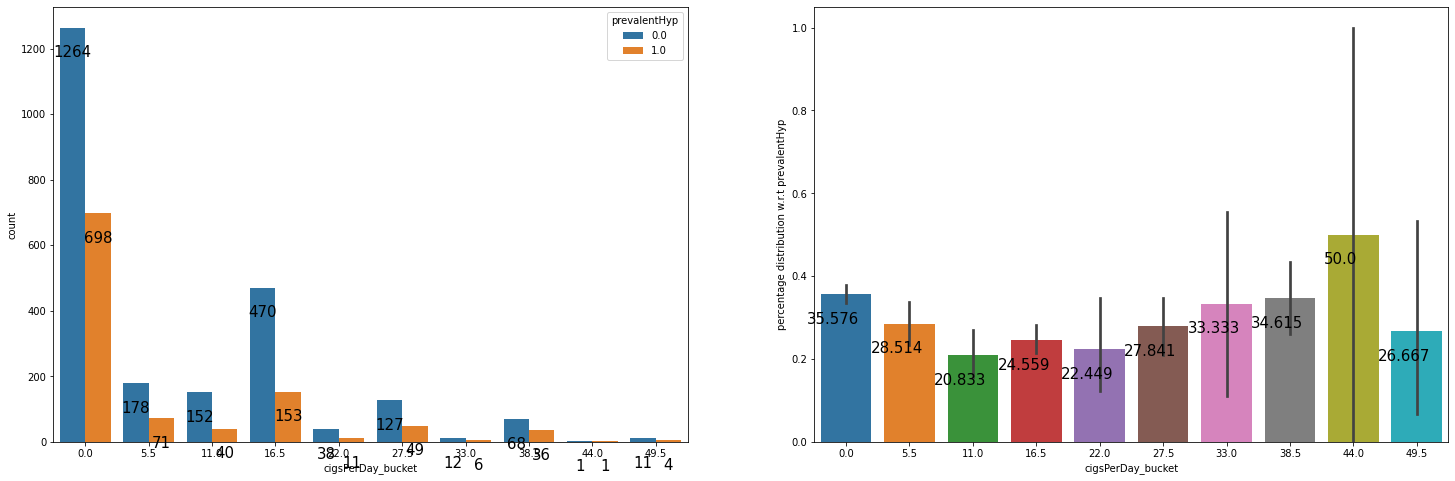

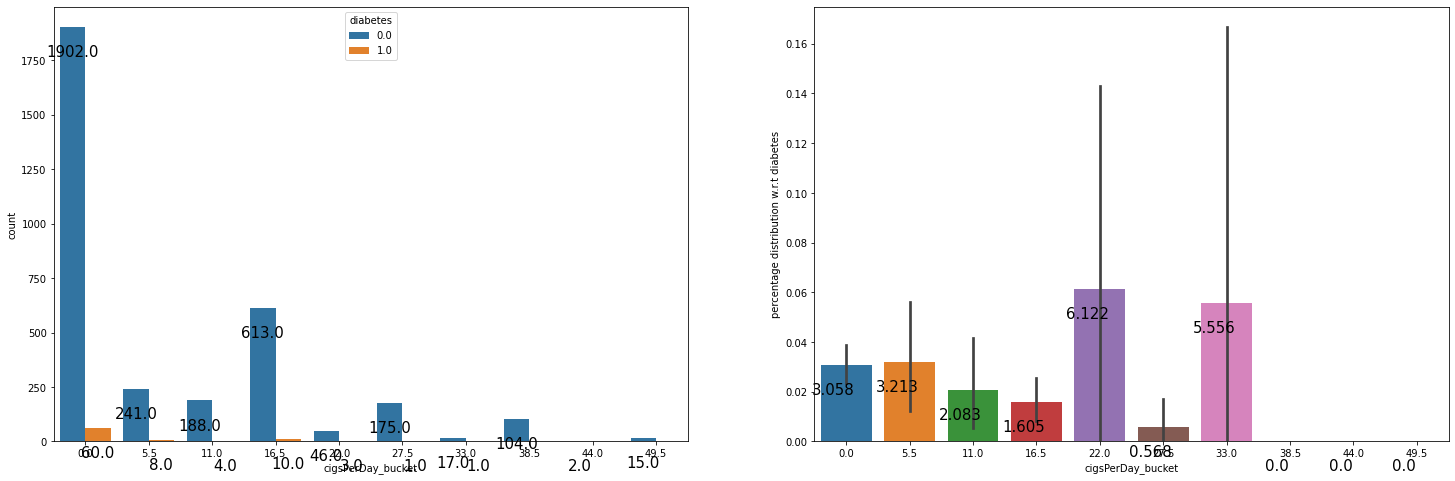

In [20]:
#For better further analysis binning is implemented on age feature
data_df['cigsPerDay_bucket'] = data_df['cigsPerDay'].apply(lambda x : 5.5*(x//5.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='cigsPerDay_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('cigsPerDay_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   Males tend to smoke more cigarettes compared to females.



### Analysis with respect to sysBP

**Analysising sysBP feature with respect to other categorical features :**

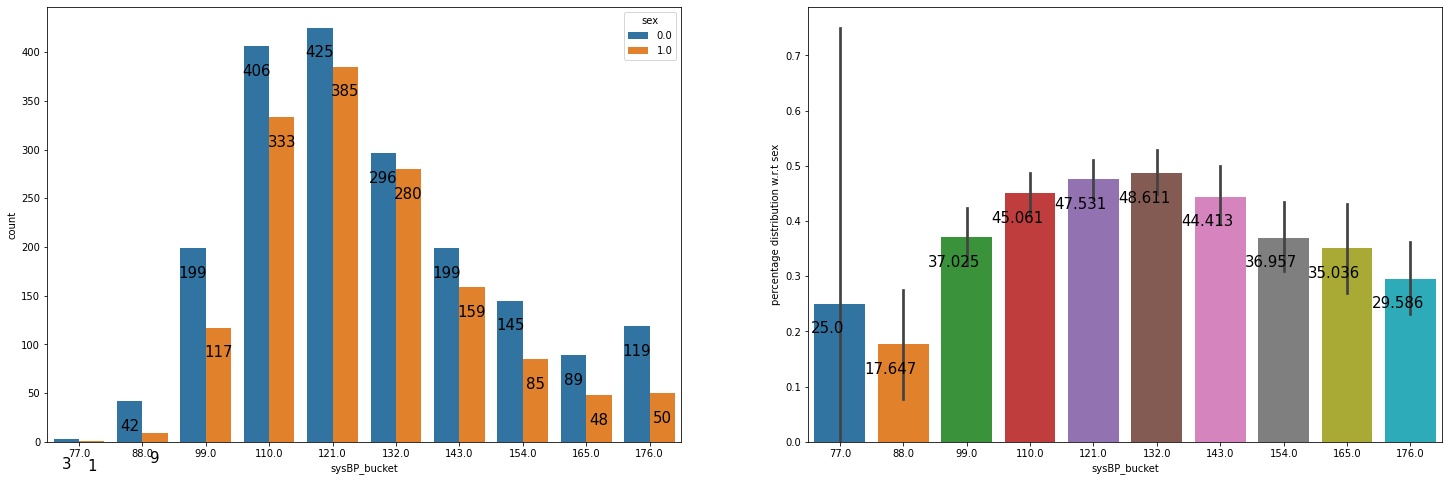

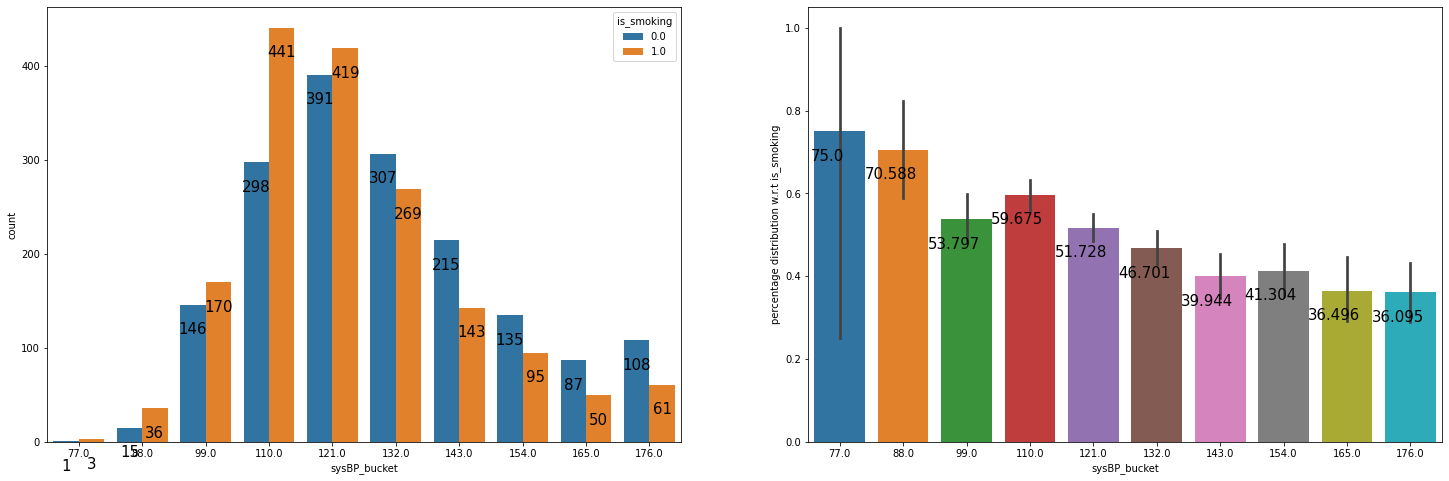

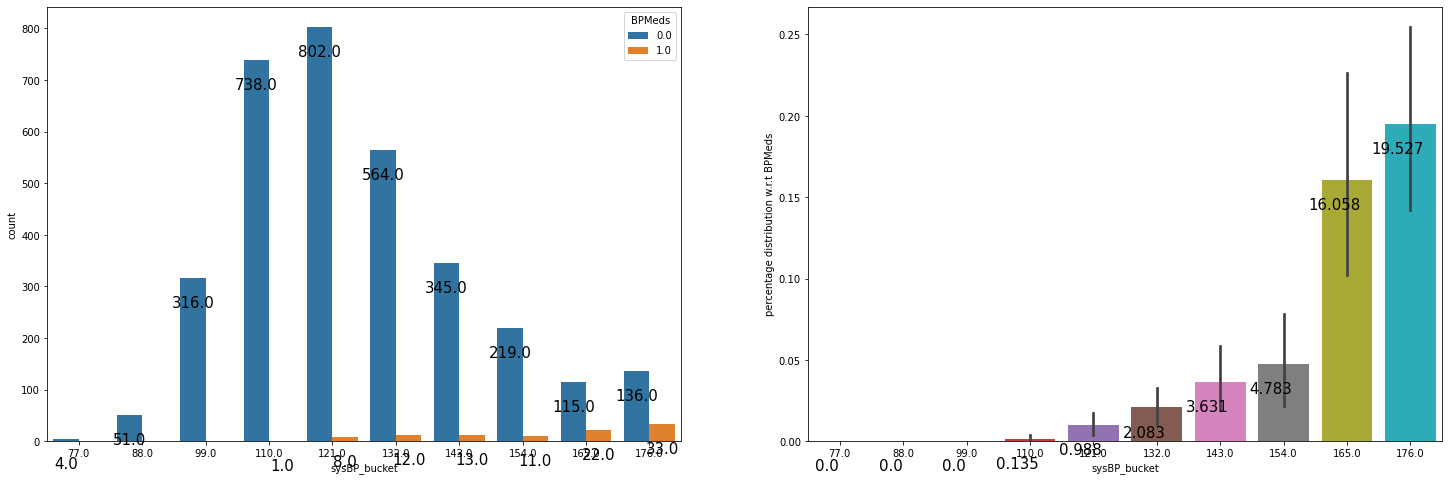

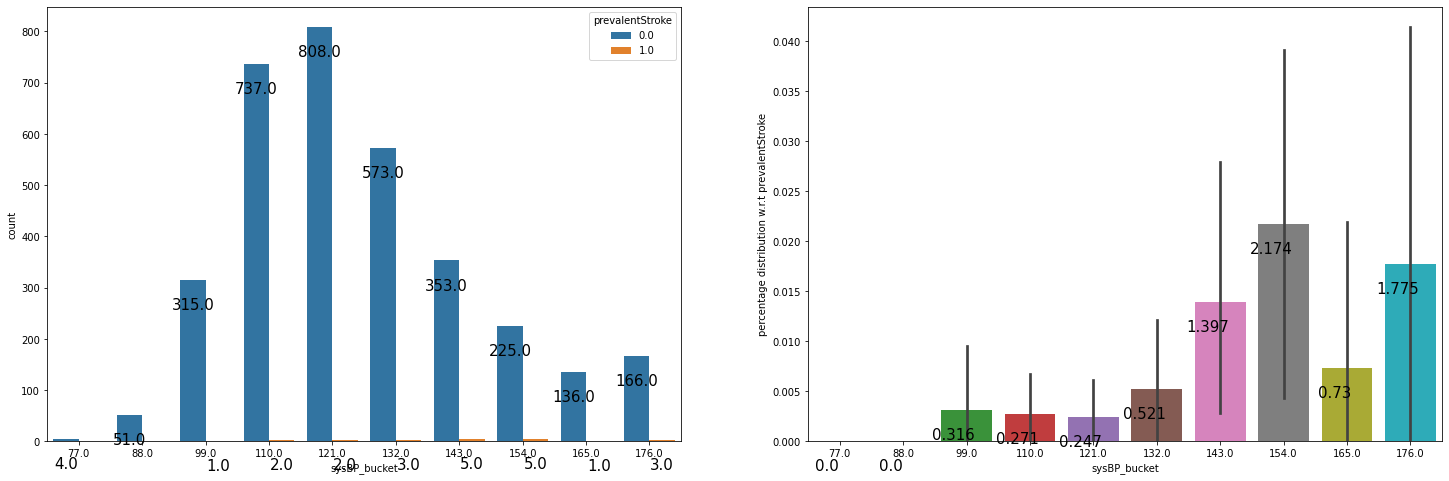

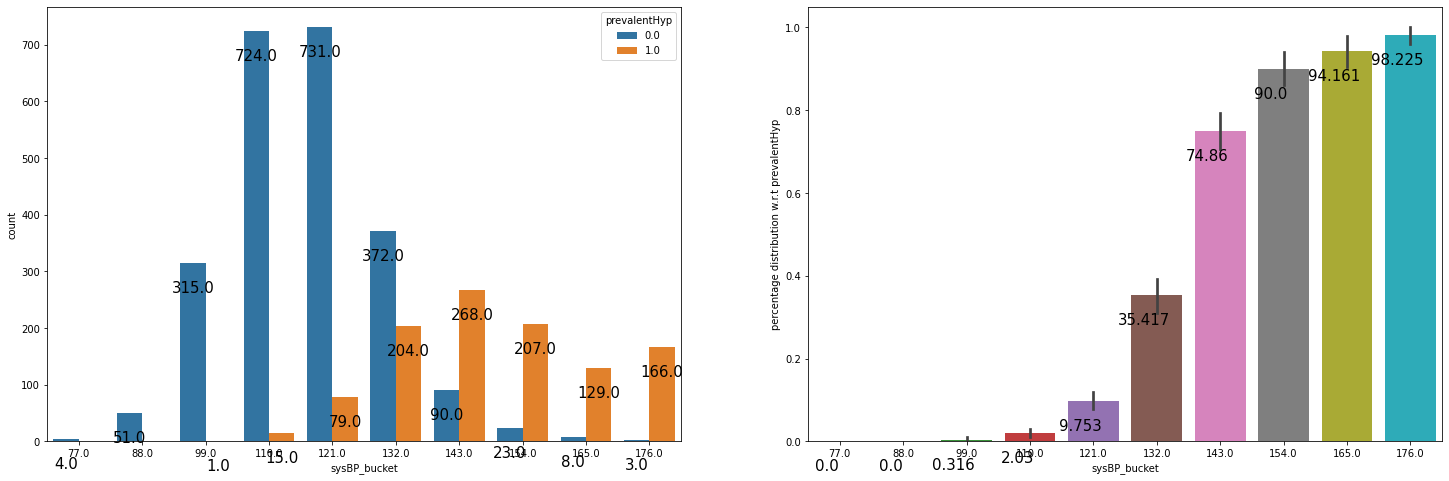

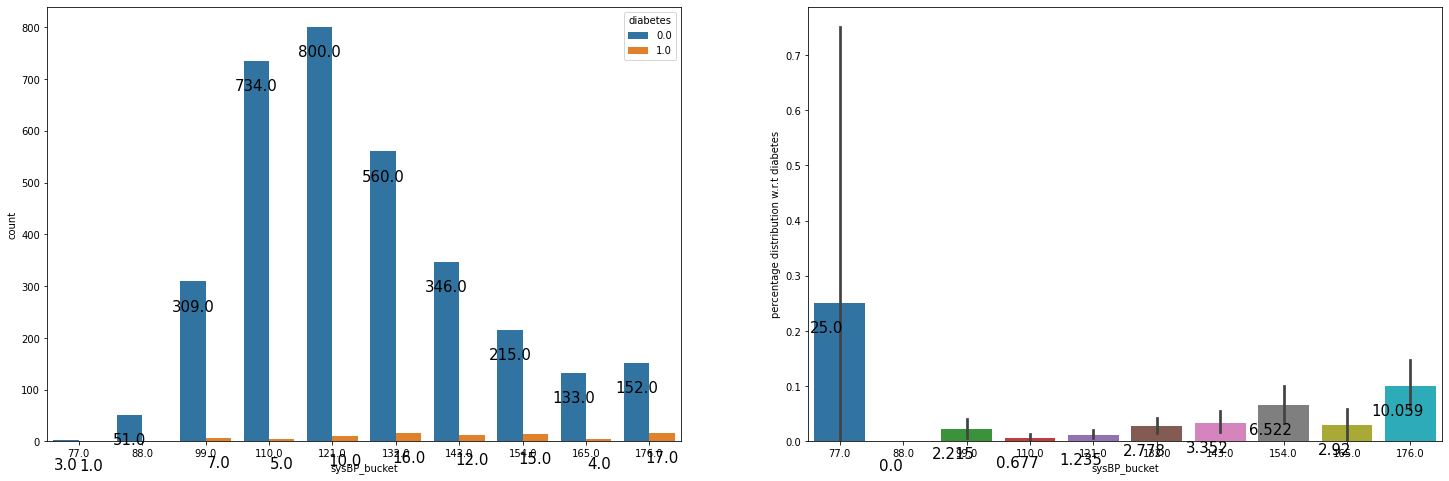

In [21]:
#For better further analysis binning is implemented on age feature
data_df['sysBP_bucket'] = data_df['sysBP'].apply(lambda x : 11*(x//11))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='sysBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('sysBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   SysBp tends to be low for smokers.
*   SysBp tends to be high for people with BP medication and hypertension issues.




### **Analysis with respect to diaBP**

**Analysising diaBP feature with respect to other categorical features :**

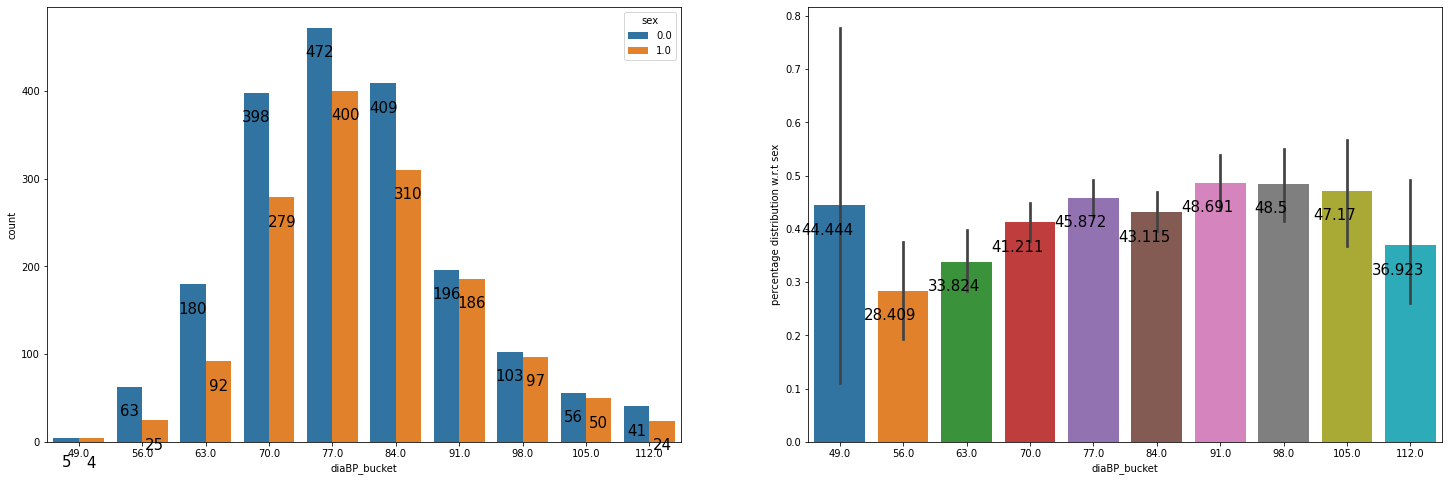

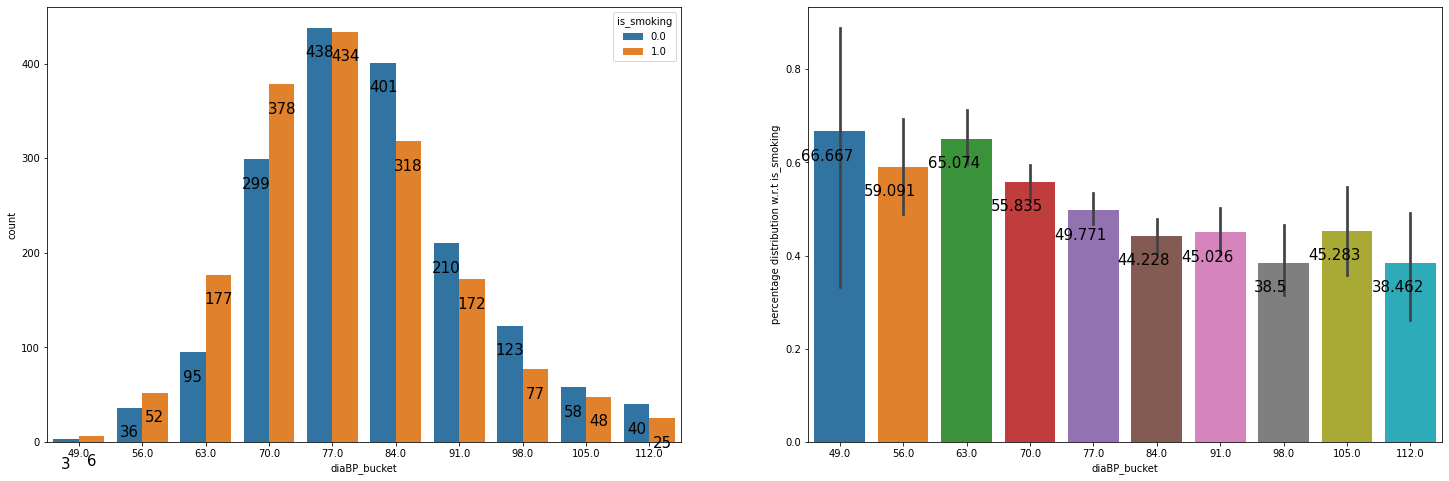

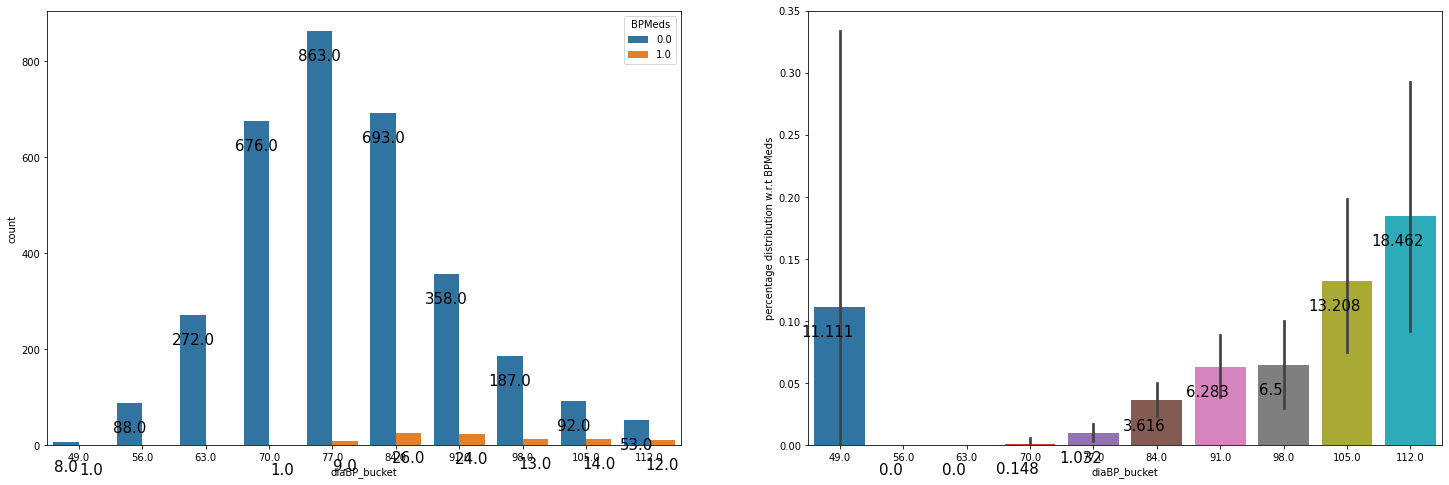

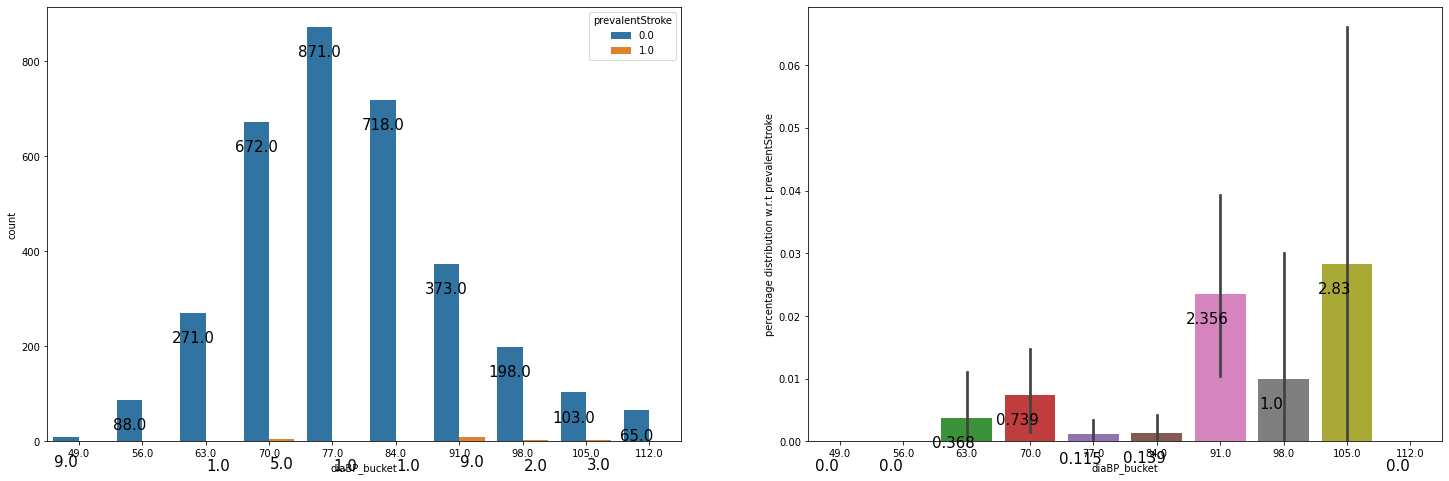

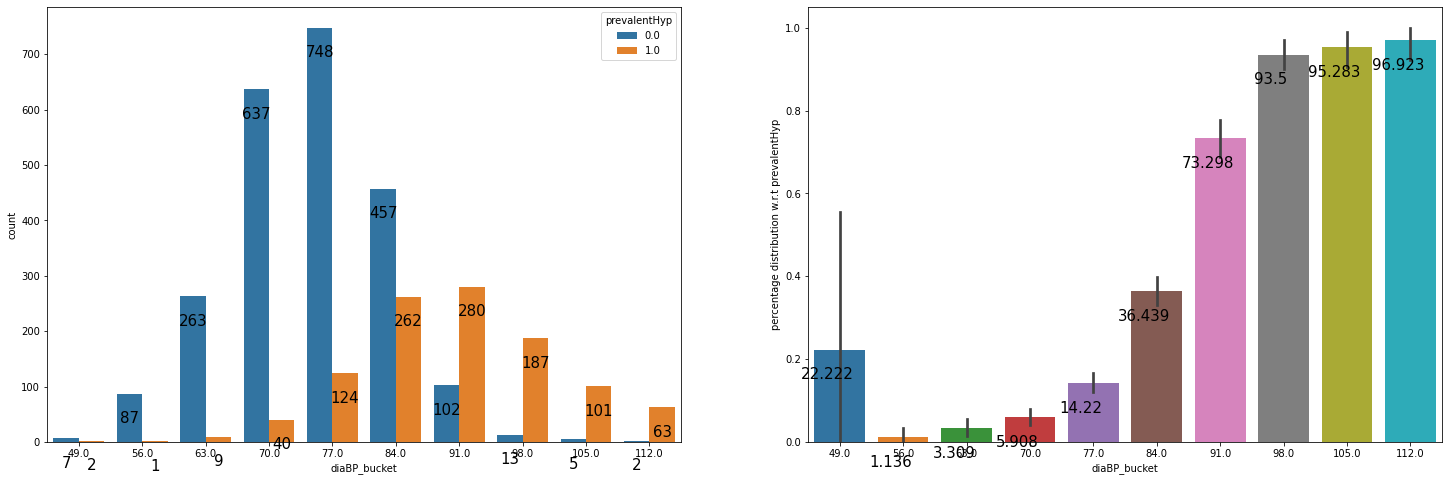

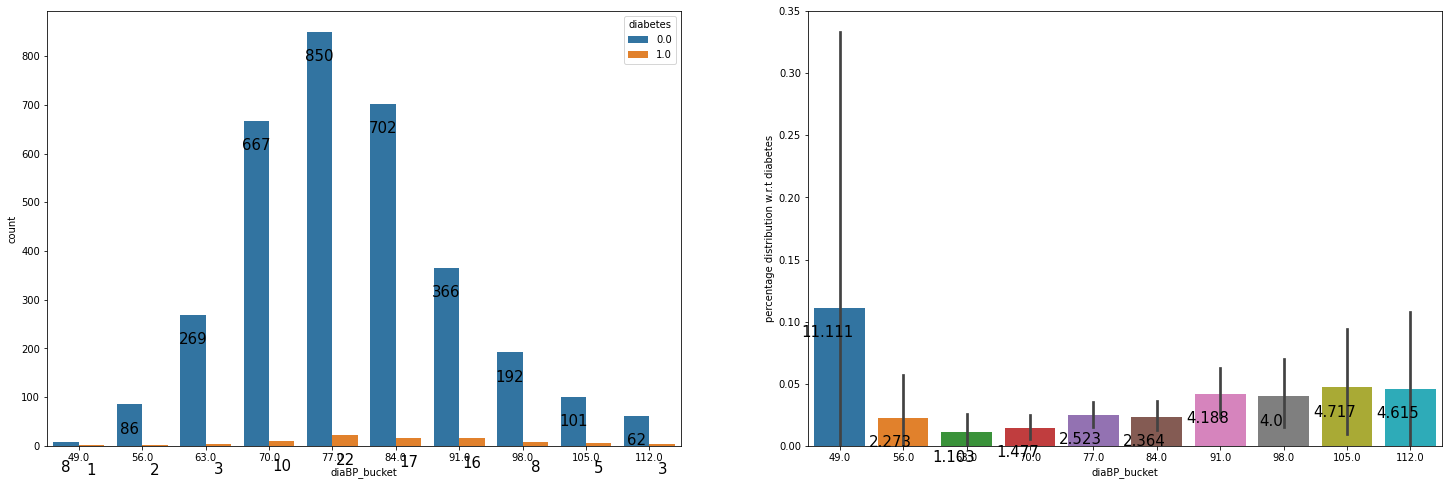

In [22]:
#For better further analysis binning is implemented on age feature
data_df['diaBP_bucket'] = data_df['diaBP'].apply(lambda x : 7*(x//7))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='diaBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('diaBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   DiaBp tends to be low for smokers.
*   DiaBp tends to be high for people with BP medication and hypertension issues.



### **Analysis with respect to BMI**

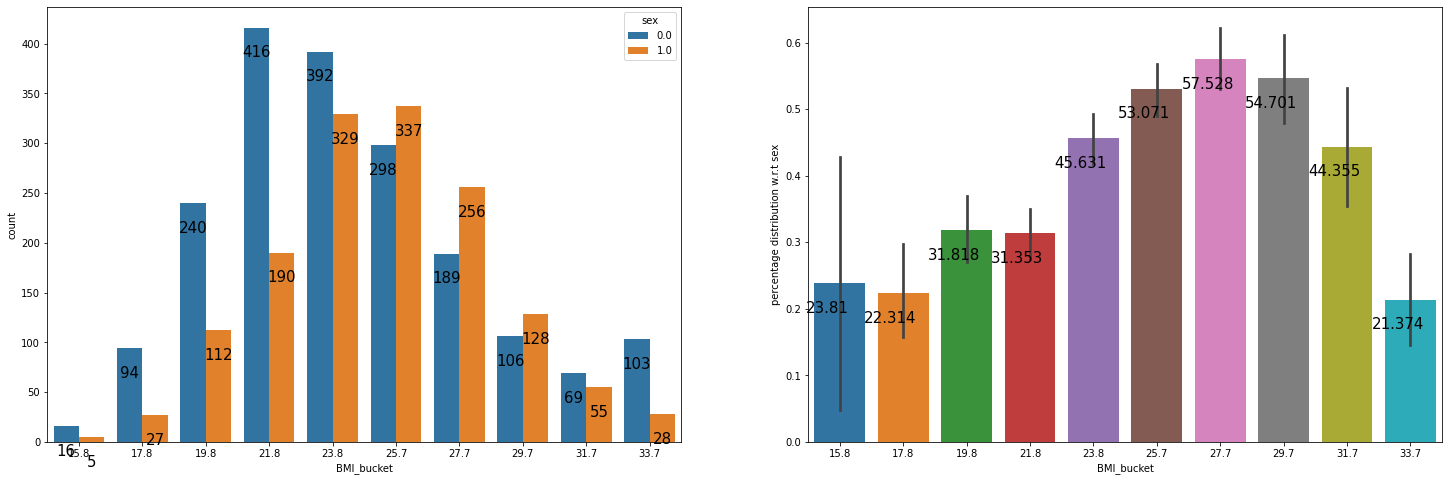

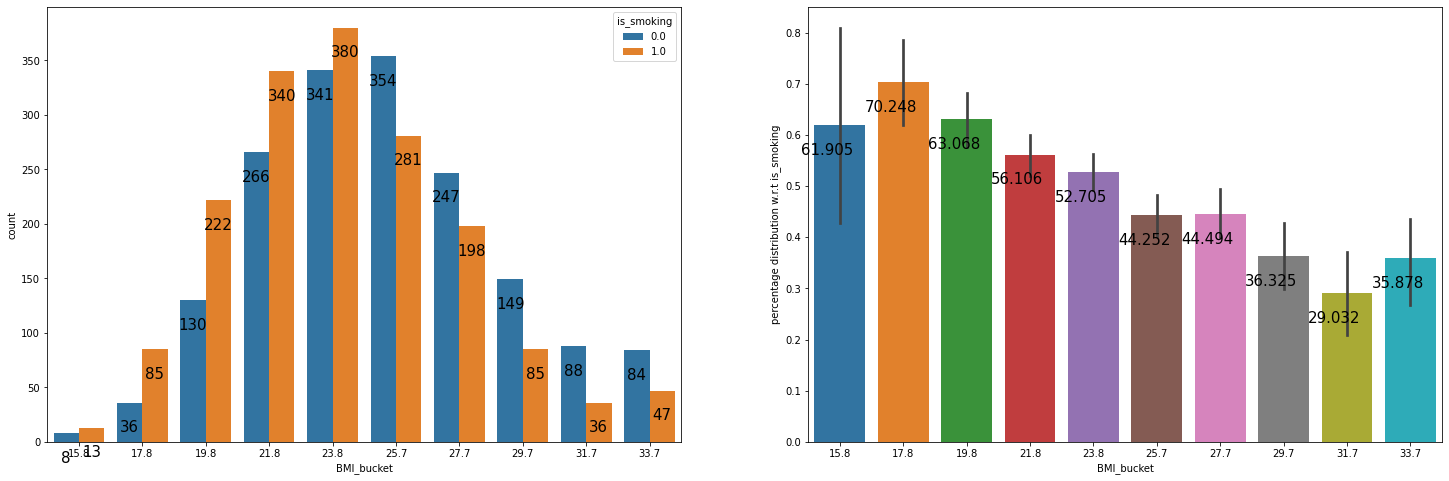

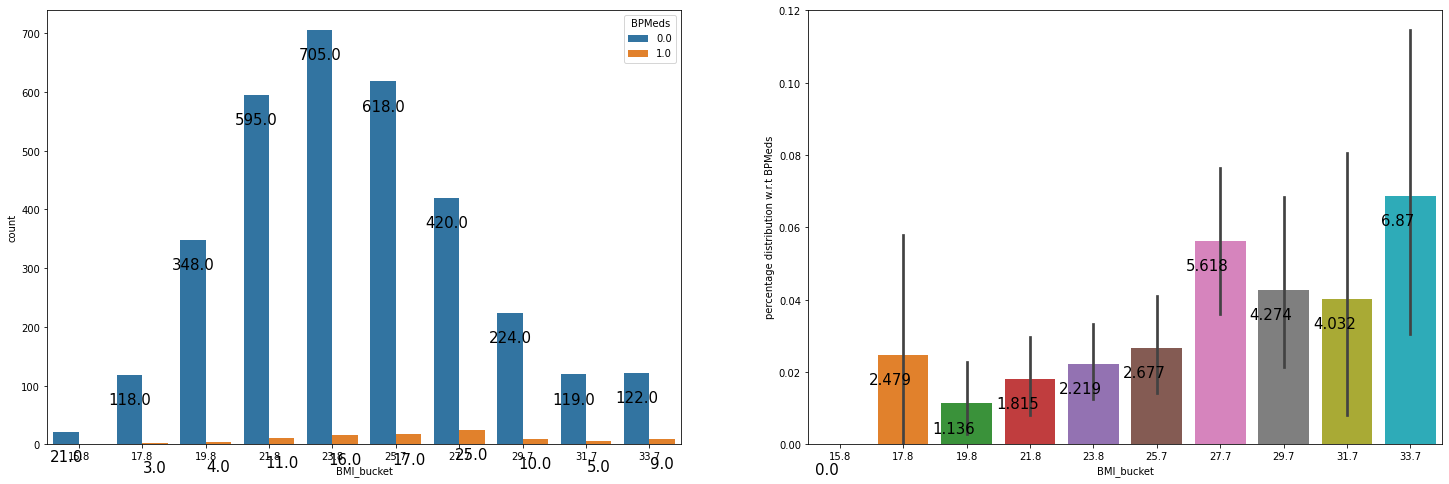

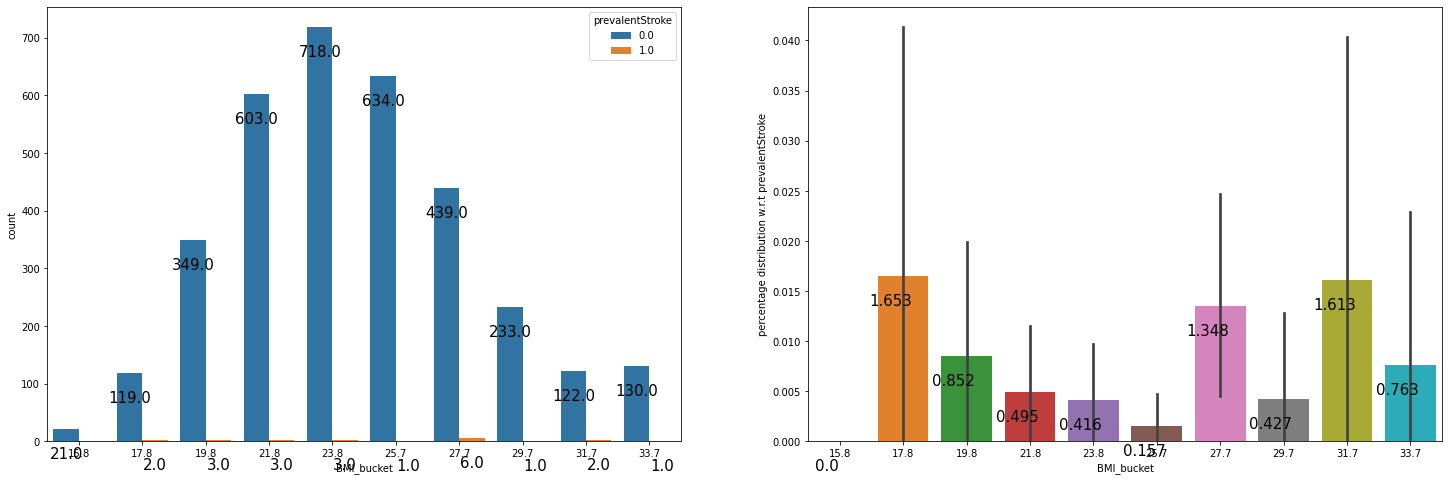

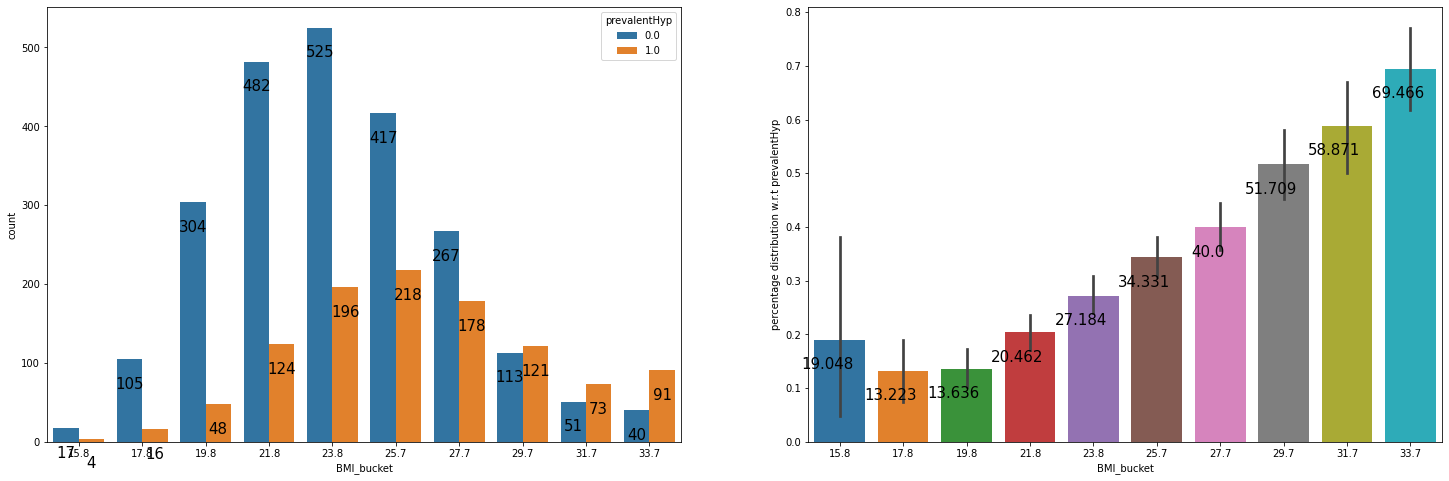

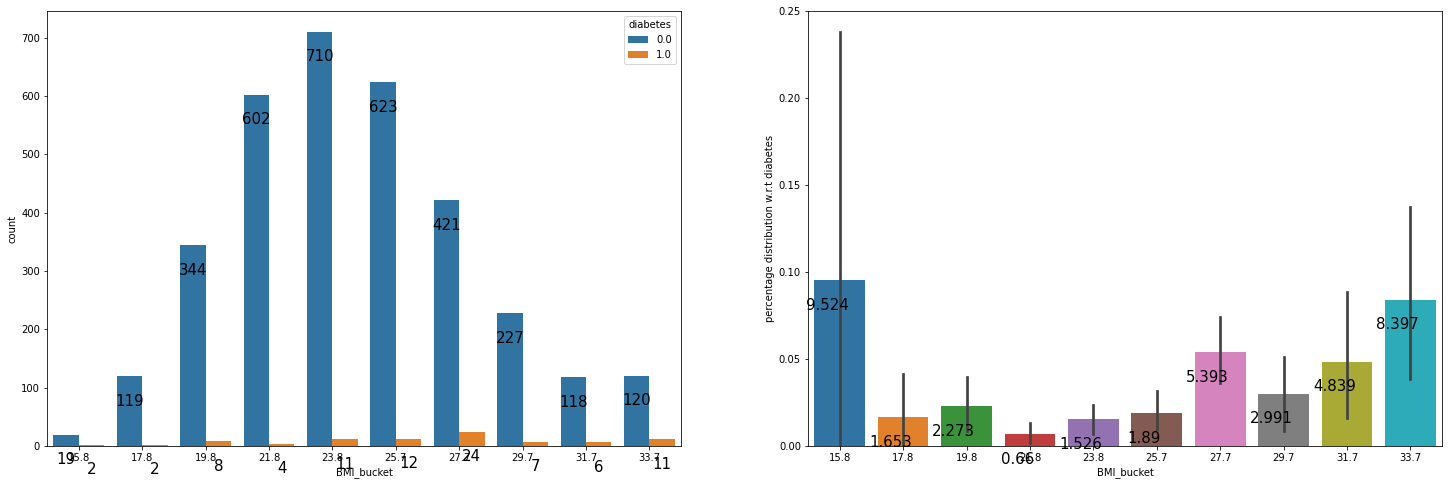

In [23]:
#For better further analysis binning is implemented on age feature
data_df['BMI_bucket'] = data_df['BMI'].apply(lambda x : round(1.98*(x//1.98),1))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='BMI_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('BMI_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   BMI levels from 15 to 22 and 30 to 34 are more prevalent in females.
*   Smokers tend to have lower BMI.
*   People with prevalent hypertension tend to have higher BMI.





### Analysis with respect to heartRate

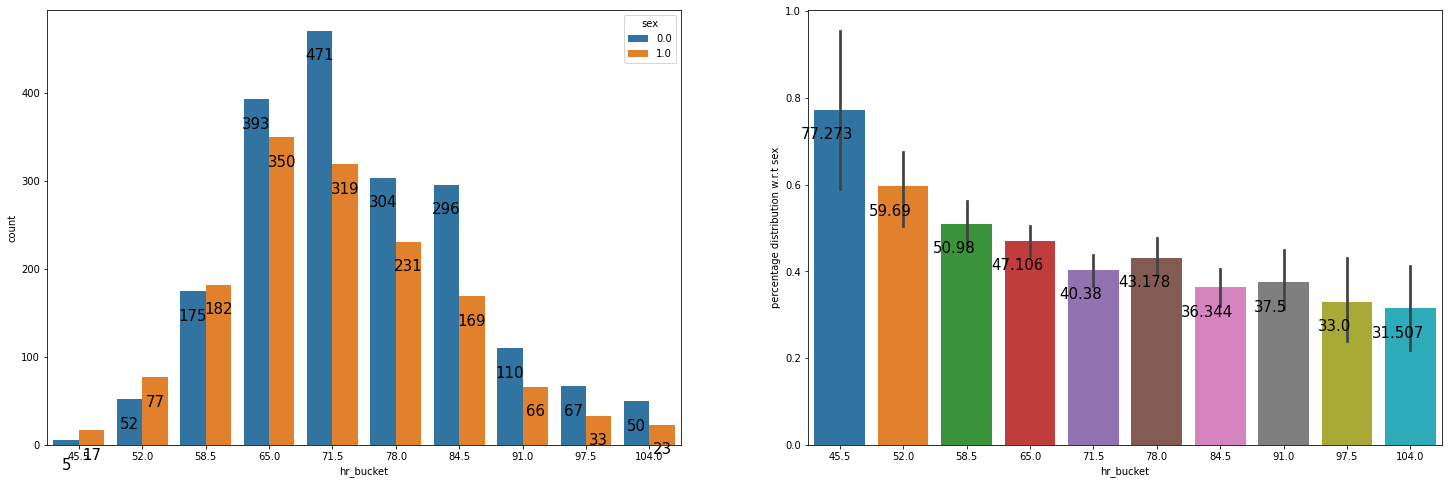

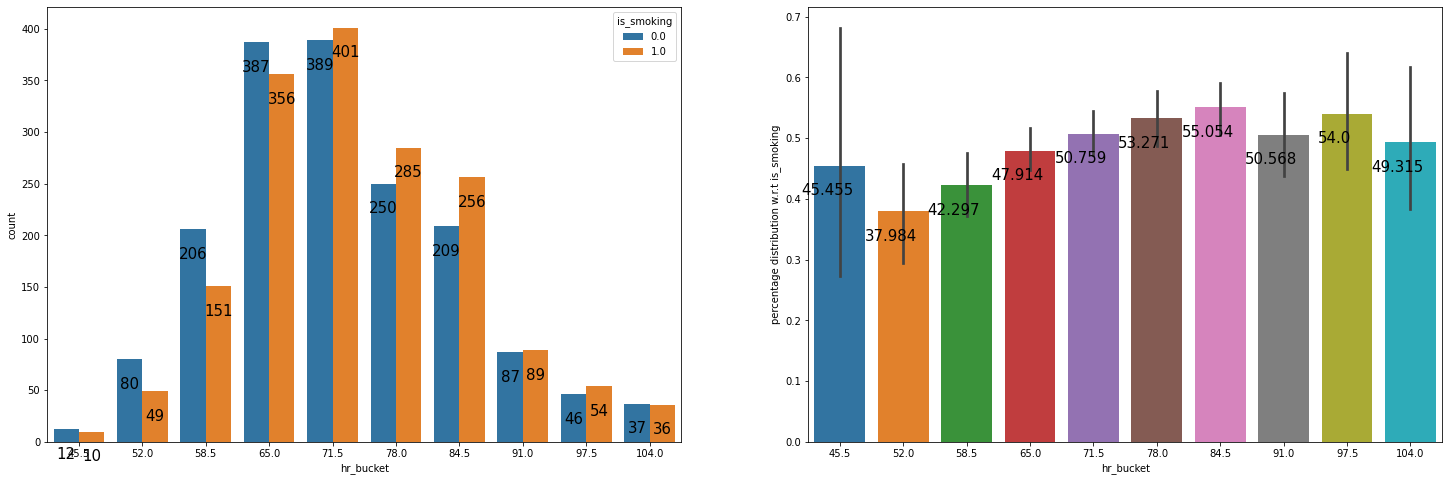

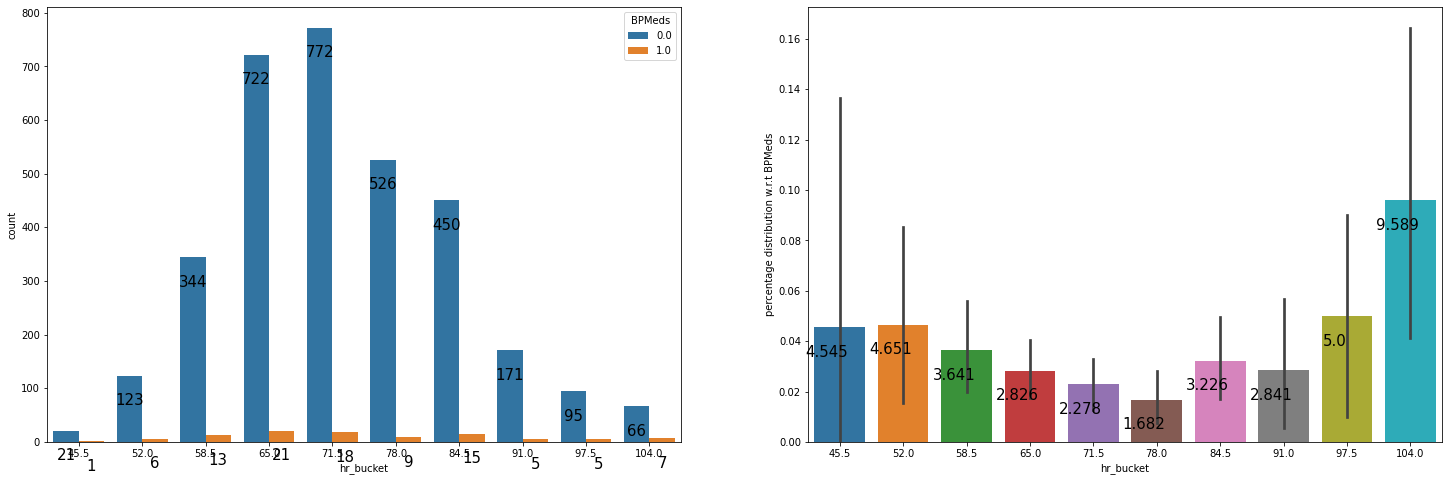

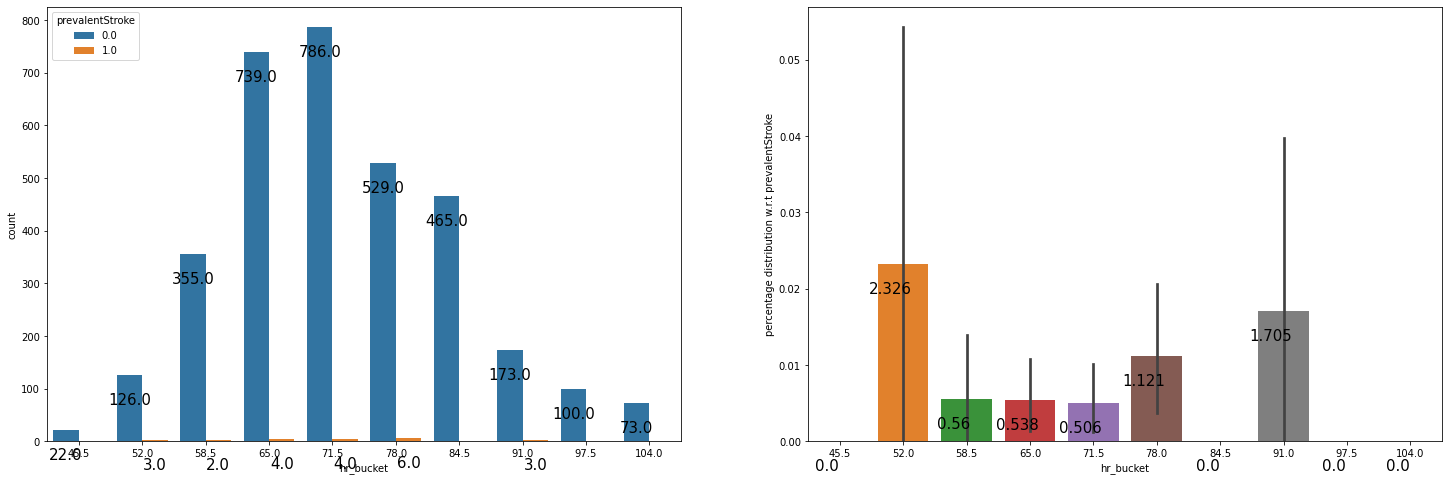

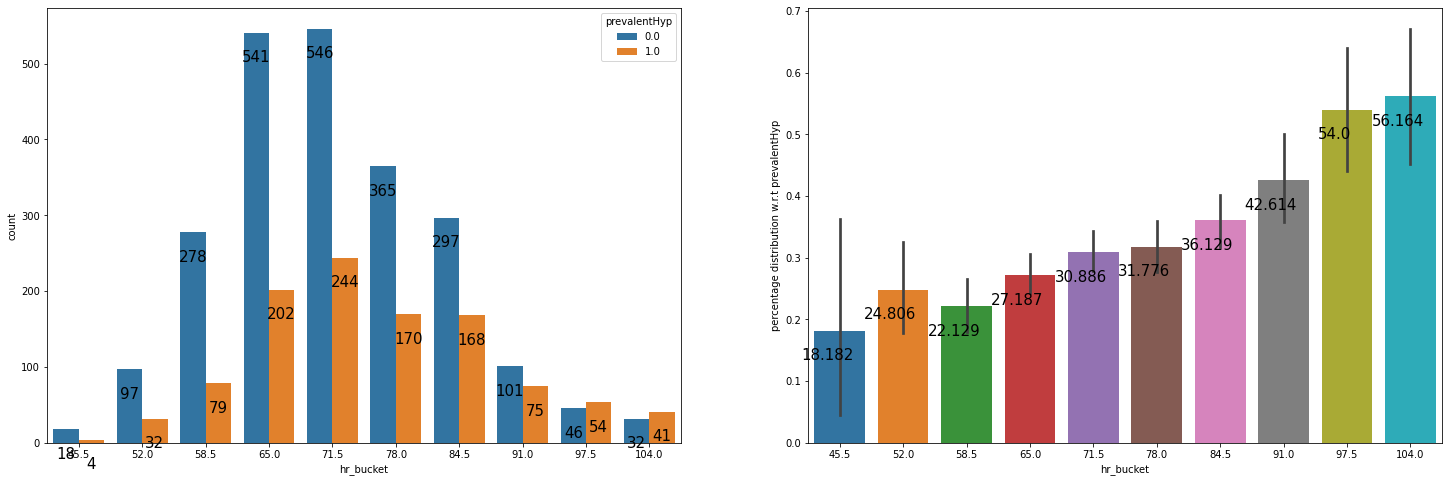

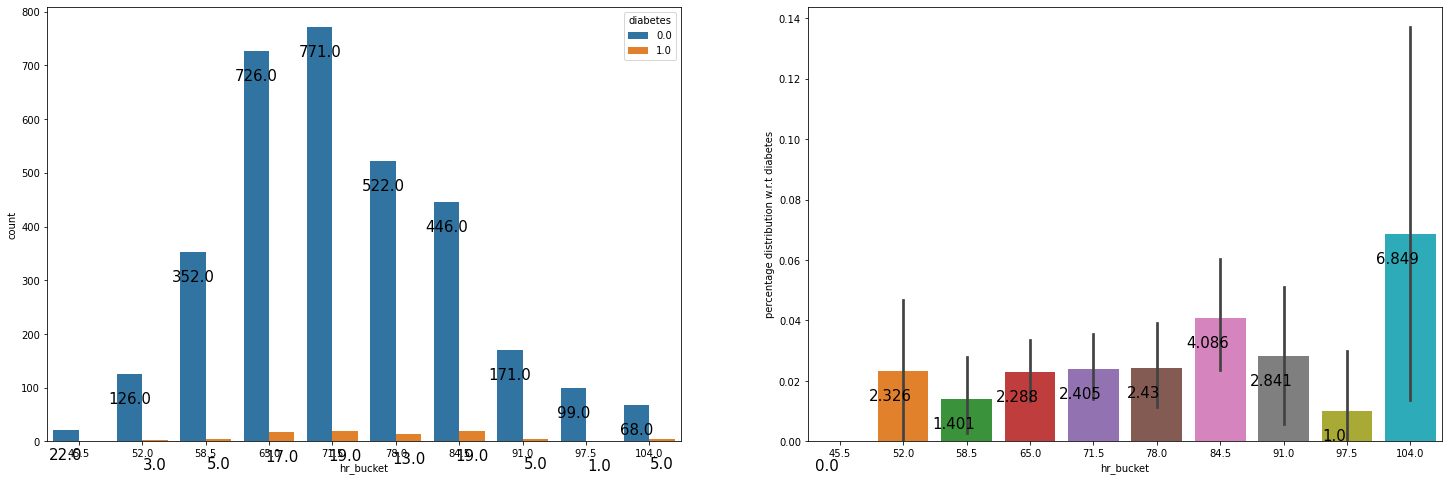

In [24]:
#For better further analysis binning is implemented on age feature
data_df['hr_bucket'] = data_df['heartRate'].apply(lambda x : 6.5*(x//6.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='hr_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('hr_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   Females and people with prevalent hypertension tend to have higher heart rates.



### Analysis with respect to glucose

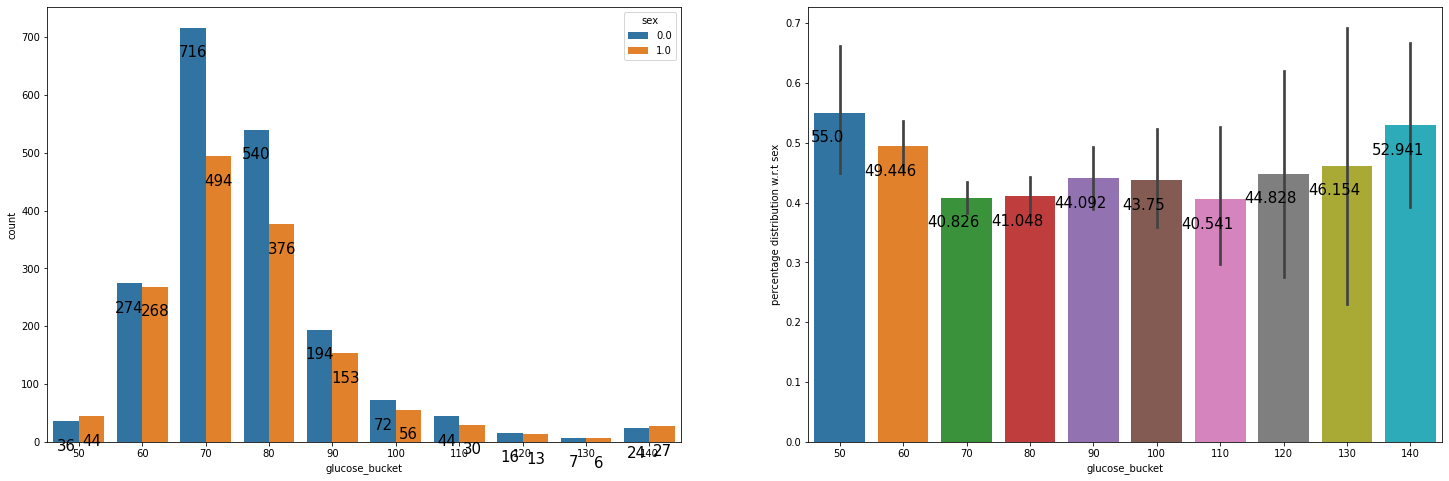

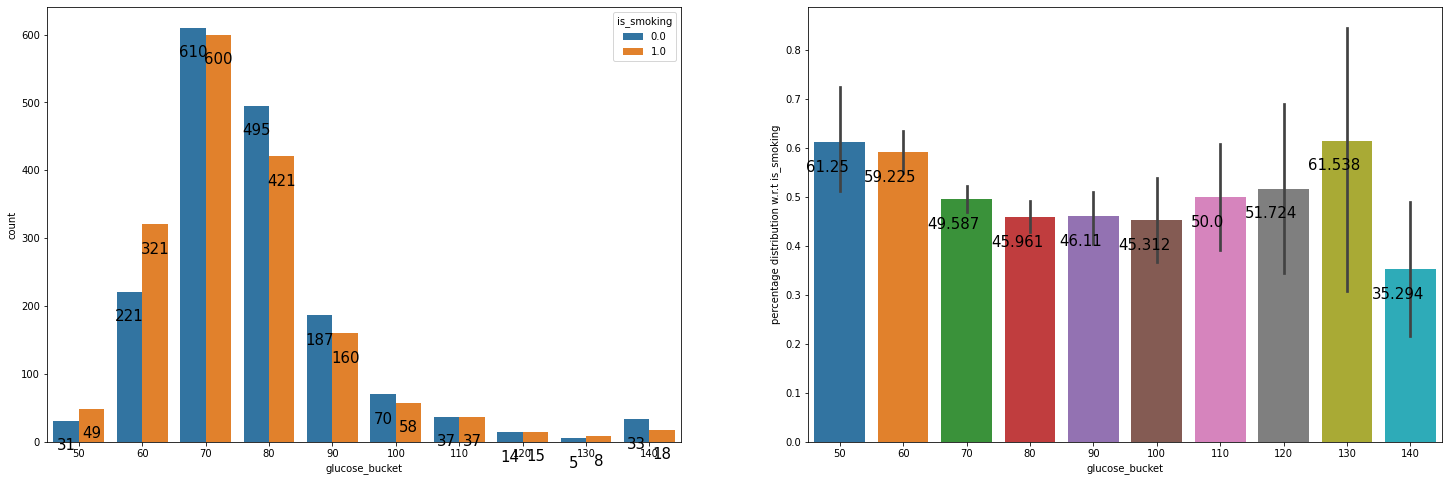

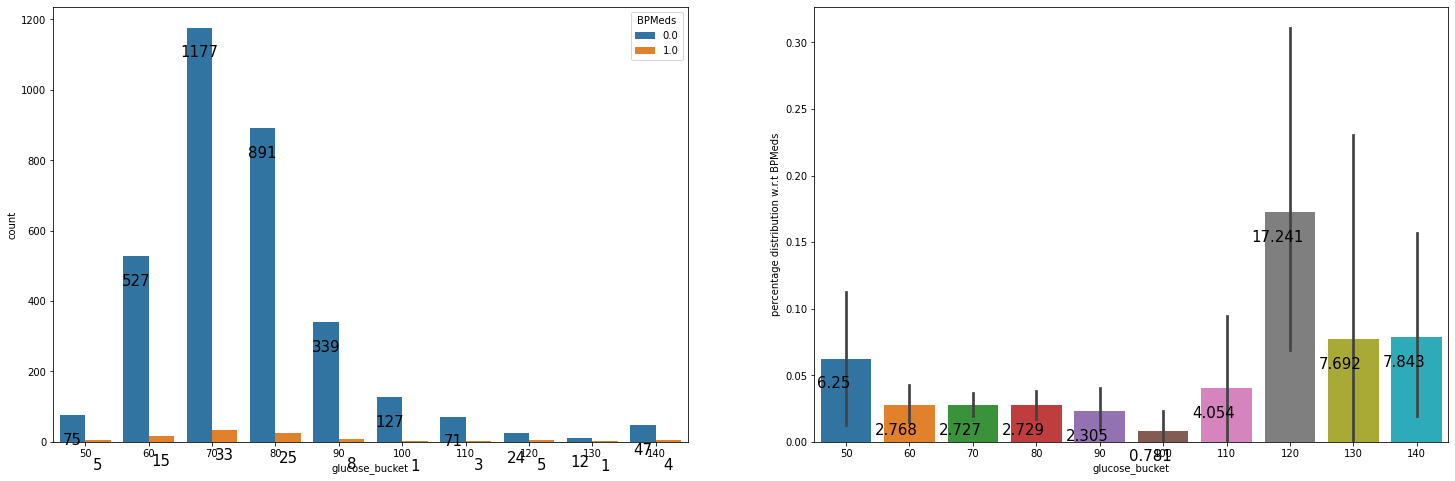

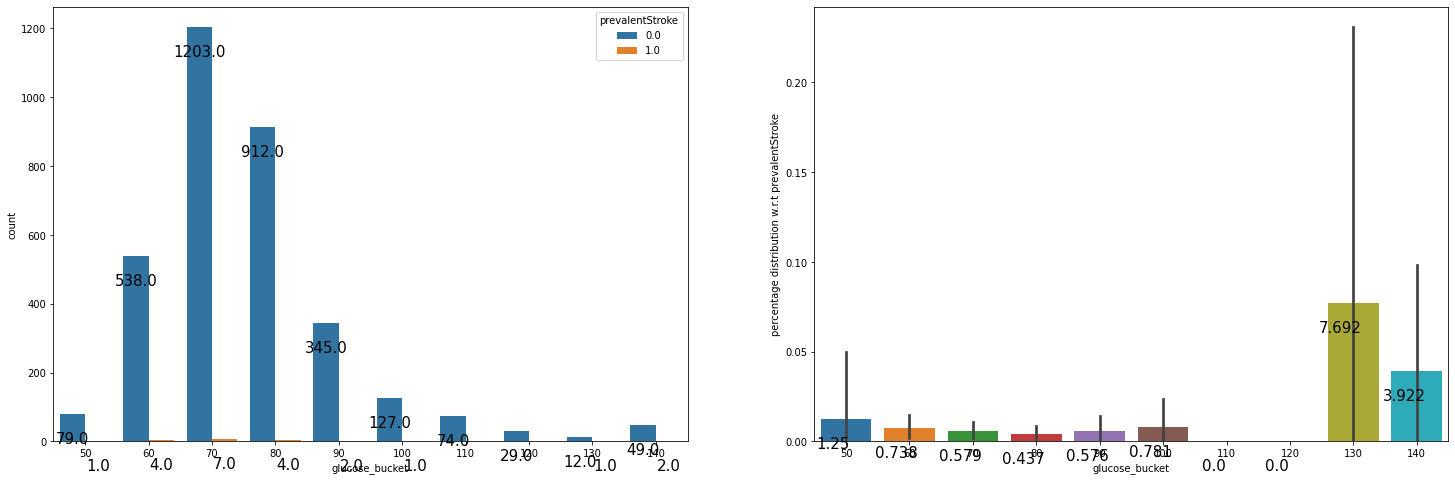

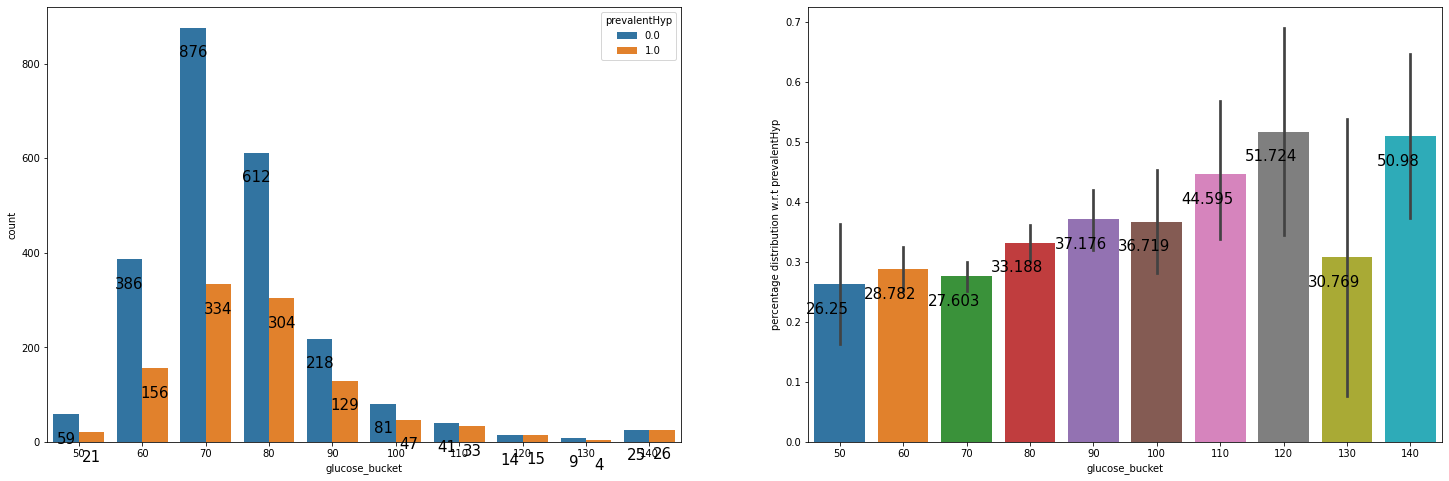

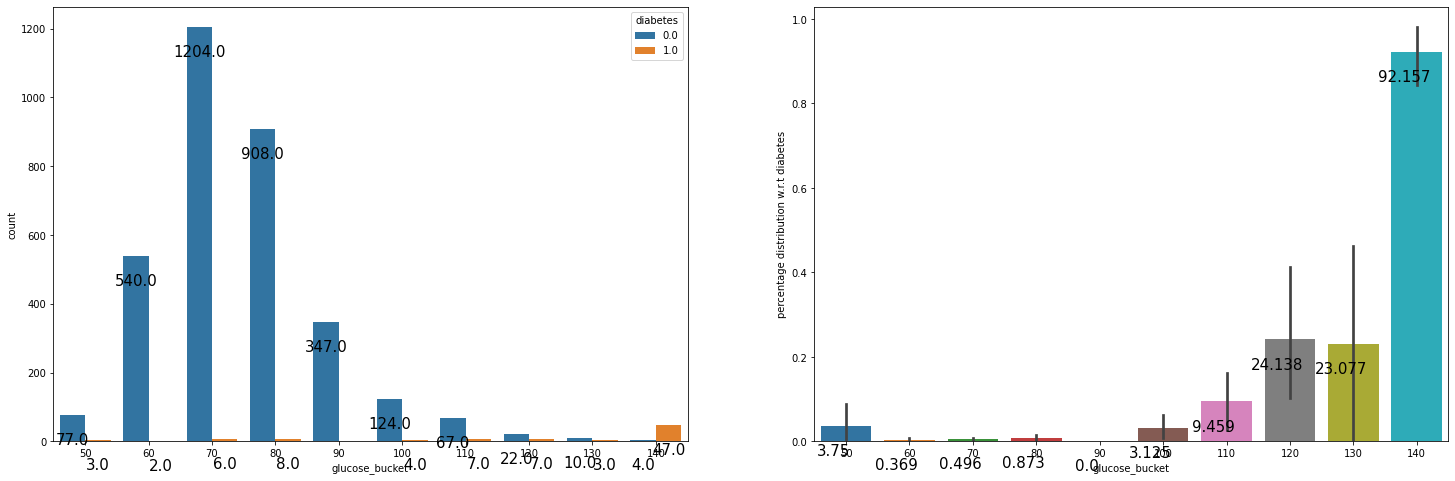

In [25]:
#For better further analysis binning is implemented on age feature
data_df['glucose_bucket'] = data_df['glucose'].apply(lambda x : round(10*(x//10)))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='glucose_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('glucose_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   People with prevalent hypertension tend to have higher glucose levels.



## Analysing numerical features with respect to target feature 

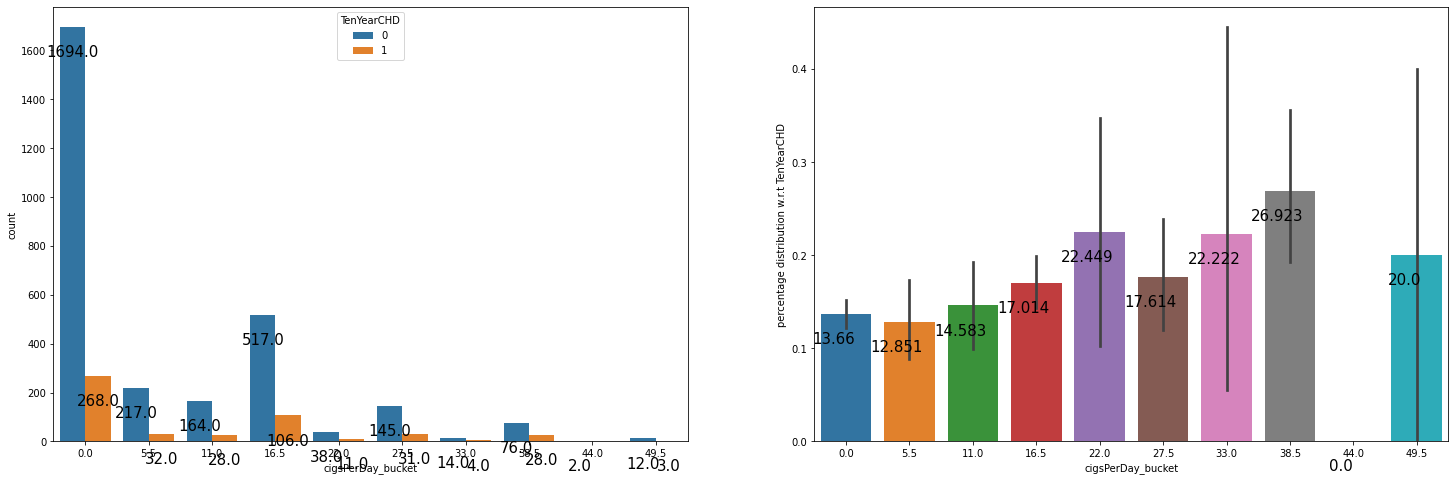

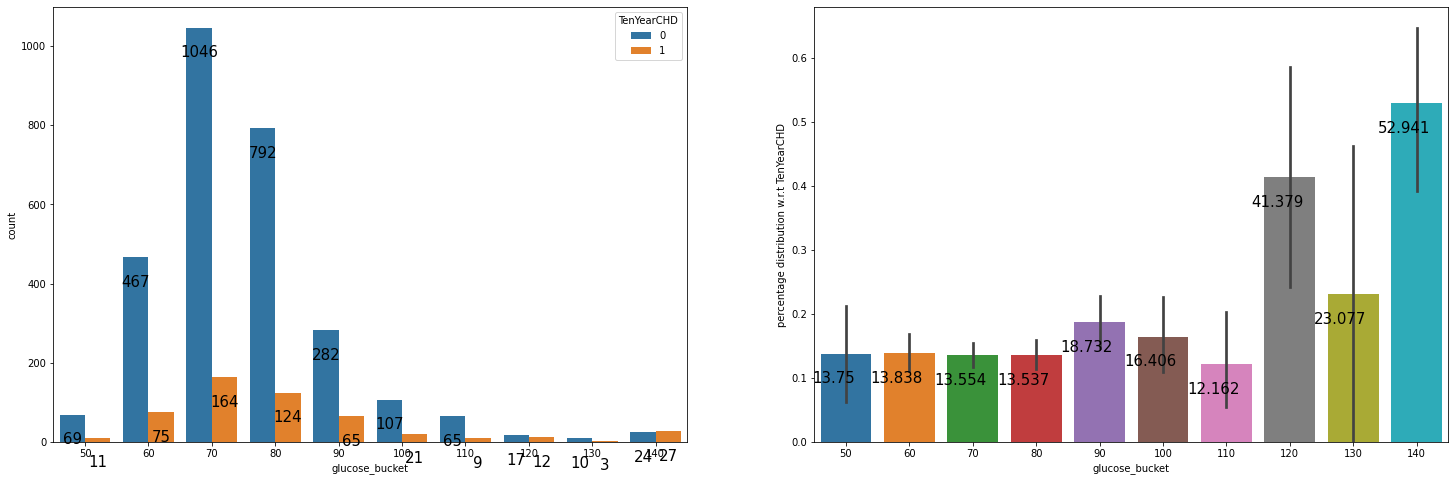

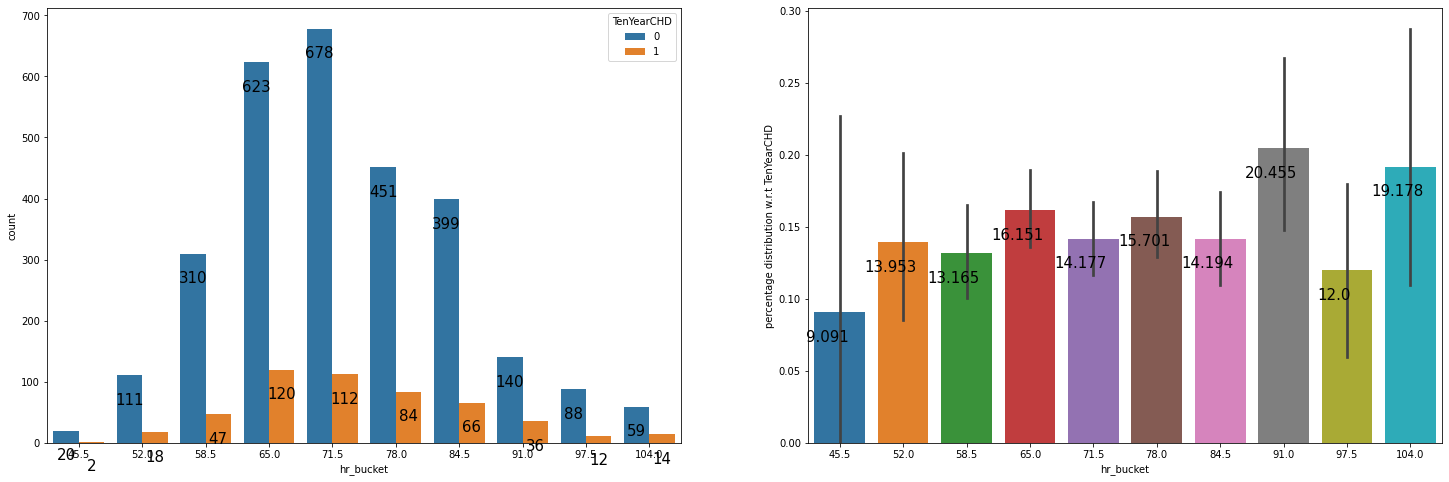

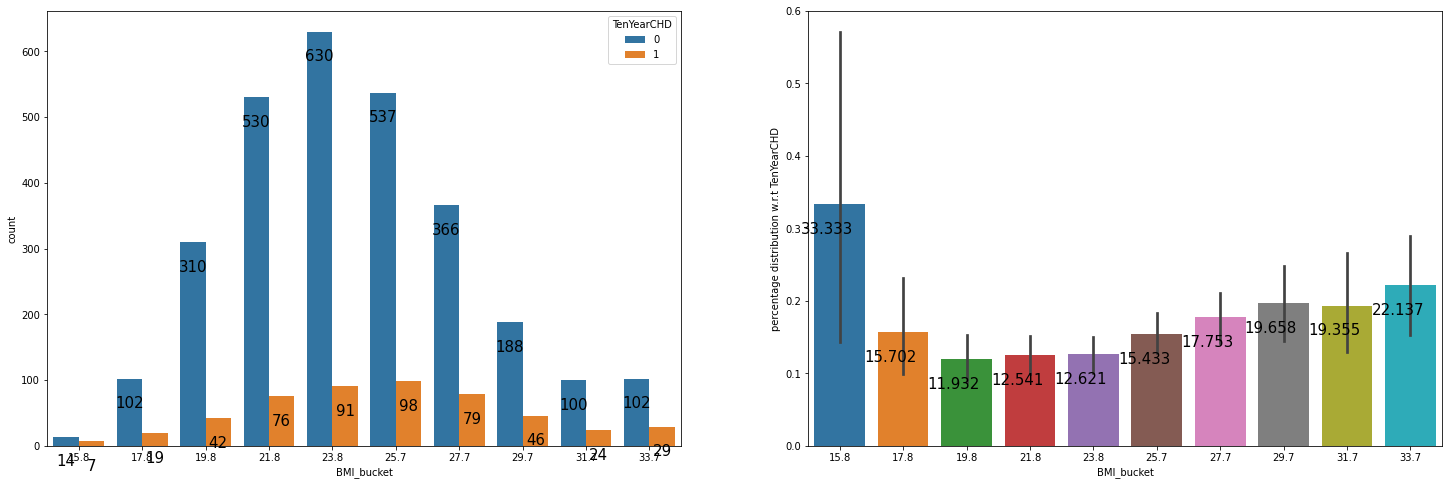

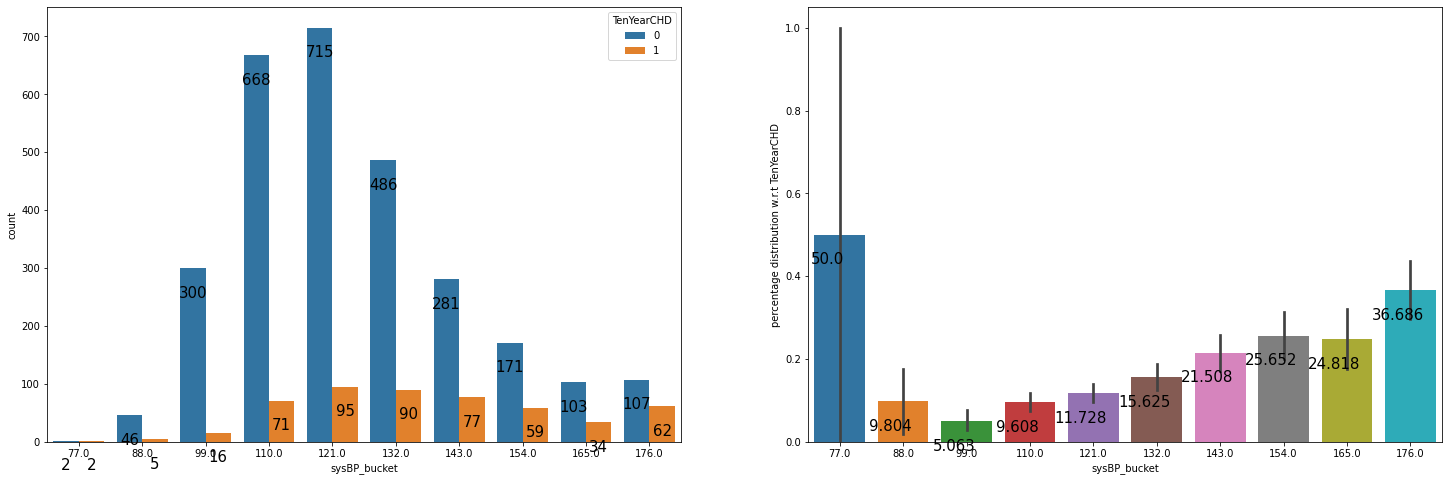

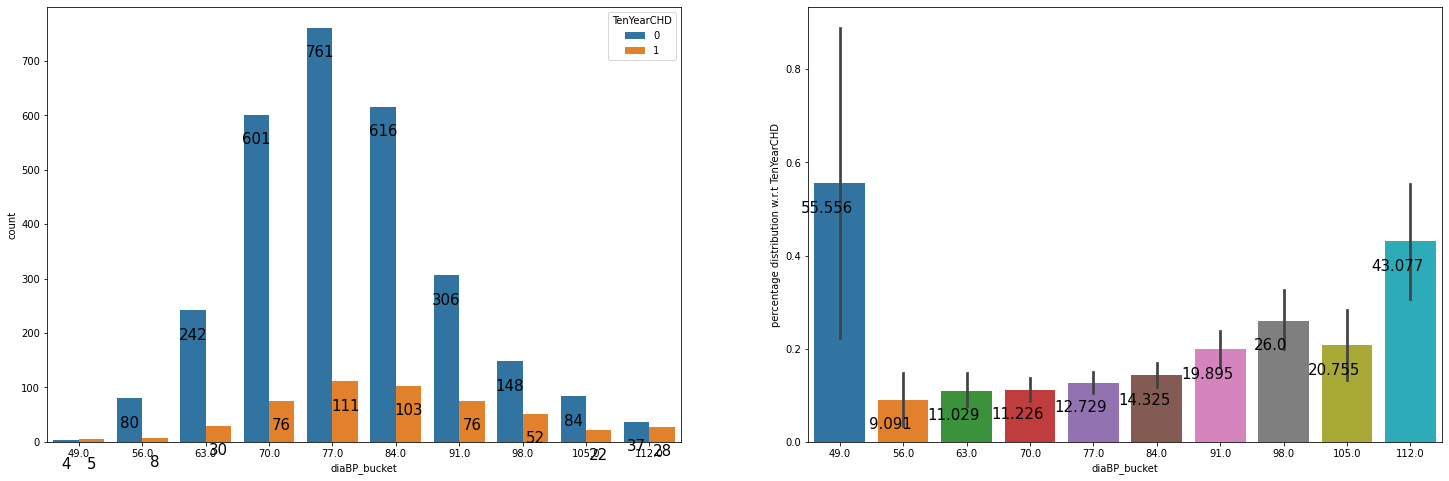

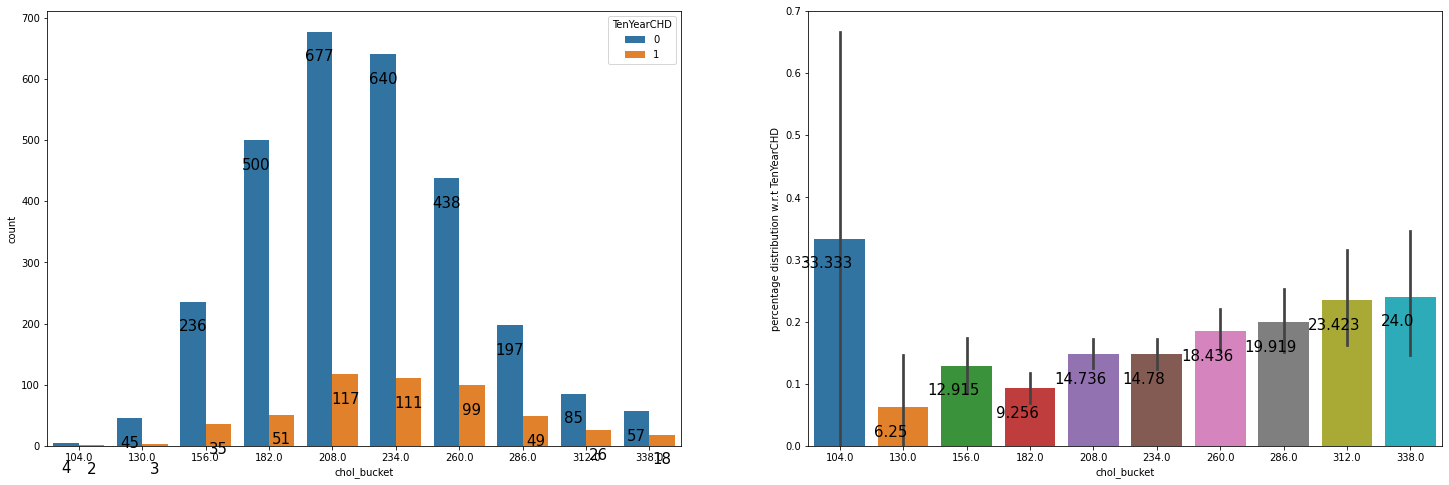

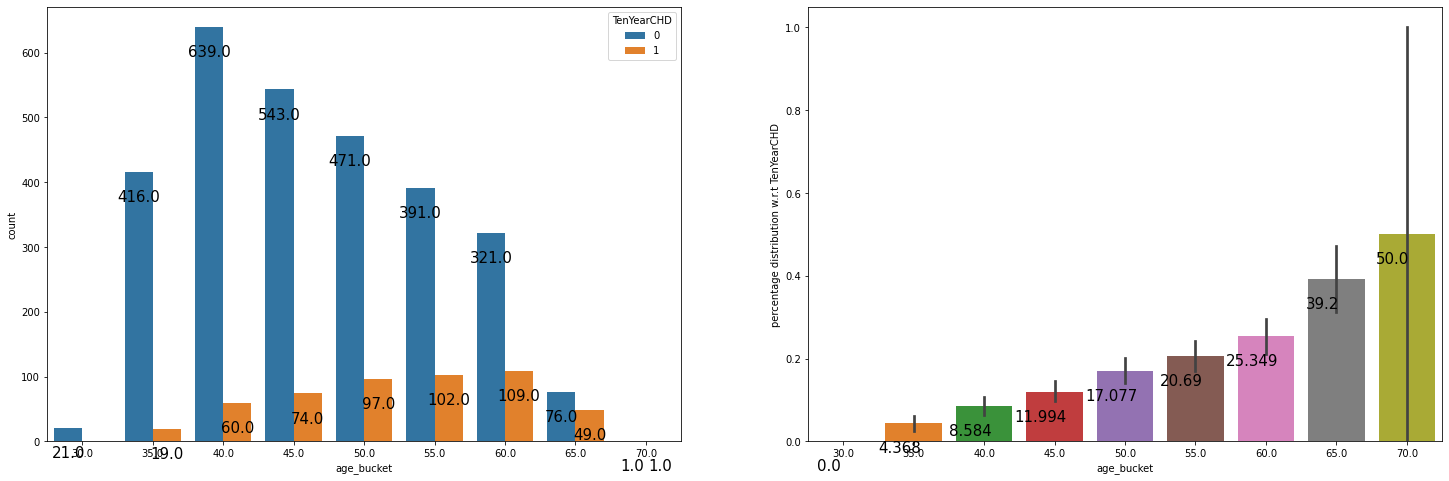

In [26]:
#Analysising age feature with respect to other categorical features
for v in ['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot(v,'TenYearCHD', data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   An increase in glucose levels, SysBp , DiaBp and age tend to have a higher chance for CHD.



# Feature selection and final data processing

In [27]:
#droping those binned features which were created while doing EDA
data_df=data_df.drop(columns=['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket'])

In [28]:
data_df=data_df.apply(pd.to_numeric)#for further analysis,converting data values to numeric since some values are encoded as 'object' Dtype


## correlation analysis

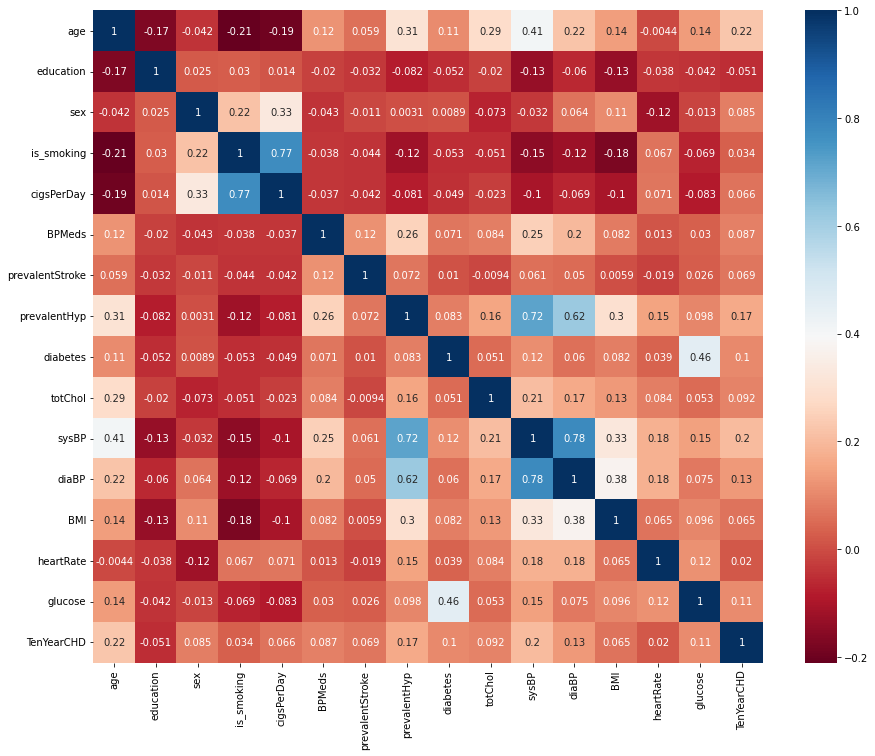

In [29]:
#Checking correlation between each features
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)#Heatmap based on carrelation values

REMARKS:

'SysBP' and 'DiaBp' is having high correlation of 0.78 followed by 'cigsPerDay' and 'is_smoking' with 0.77, 'SysBP' and 'prevalentHyp' with 0.72  and 'DiaBp' and 'prevalentHyp' with 0.62.

In order to resolve high correlation between 'SysBP' and 'DiaBp', a new feature 'PP'(Pulse pressure) is introduced which is the deference between 'SysBP' and 'DiaBp'.



In [30]:
data_df['PP']=abs(data_df['sysBP']-data_df['diaBP'])#Introducing 'PP' feature in the dataset
data_df=data_df.drop(columns=['is_smoking','diaBP','sysBP','prevalentHyp'])#removing other irrelevant highly correlated features 

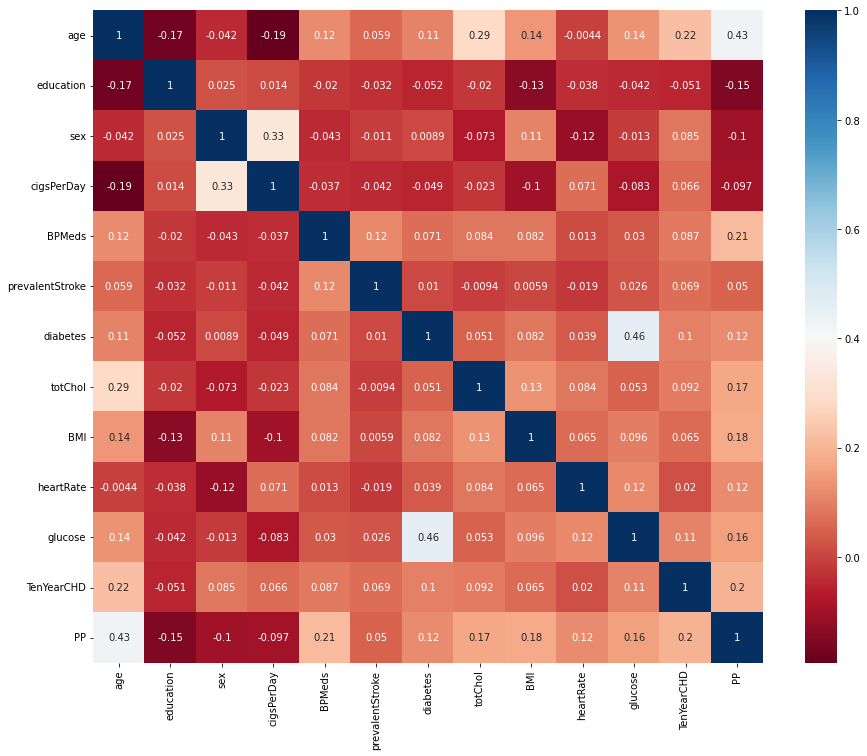

In [31]:
#Rechecking correlation after necessary changes
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)#Heatmap based on carrelation values

## Handling class imbalance

In [32]:
#Assigning x and y variables
X = data_df.drop(columns=['TenYearCHD'], axis=1)
y = data_df['TenYearCHD']

In [33]:
#checking value count of target variable
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Class imbalance is observed w.r.t target variable.

inorder to resolve class imbalance Synthetic Minority Over-sampling Technique is used here. 

In [34]:
# Using SMOTE to oversample
X,y =SMOTE().fit_resample(X,y)

In [35]:
#checking value count of target variable
y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

## Feature selection based on information gain and feature importance

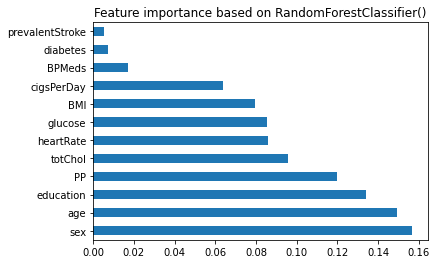

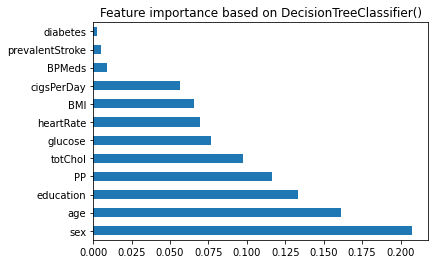

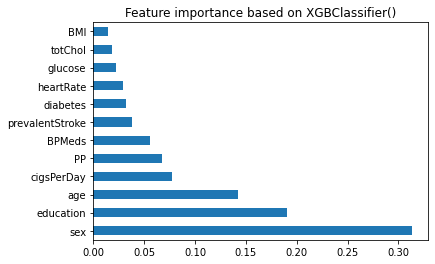

In [36]:
#Analysing feature importance based RandomForestClassifier,DecisionTreeClassifier and XGBClassifier
for v in [RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier()]:
    v.fit(X,y)
    ranked_features=pd.Series(v.feature_importances_,index=X.columns)
    ranked_features.nlargest(15).plot(kind='barh')#barplot based on feature importance
    plt.title(f'Feature importance based on {v}')
    plt.show()

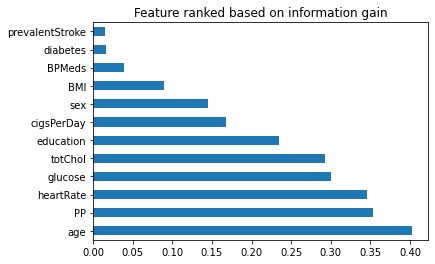

In [37]:
#Analysing feature based on information gain using mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
ranked_features=pd.Series(mutual_data,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')#barplot based based on information gain
plt.title('Feature ranked based on information gain')
plt.show()

REMARKS:

After analysing feature importance and mutual information, features such as 'prevalentStroke','diabetes','BPMeds' and 'BMI' are having less preference.

In [38]:
X=X.drop(columns=['prevalentStroke','diabetes','BPMeds','BMI'])#Droping features from x variables for further model implementation.

# Model Implementation

## Initialising Train and Test data sets

In [39]:
#Initialising train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4318, 8)
(1440, 8)
(4318,)
(1440,)


In [40]:
list(x_train)

['age',
 'education',
 'sex',
 'cigsPerDay',
 'totChol',
 'heartRate',
 'glucose',
 'PP']

In [52]:
x_train

,age,education,sex,cigsPerDay,totChol,heartRate,glucose,PP
122,61.000000,2.000000,0.000000,0.000000,270.000000,80.000000,76.000000,73.000000
4461,44.533078,2.466922,0.000000,4.669219,256.396937,73.198468,93.400766,51.400766
3759,57.894271,1.567303,1.000000,35.673032,227.836516,72.836516,85.000000,58.894271
3209,59.000000,1.000000,0.000000,0.000000,254.000000,80.000000,83.400000,51.000000
2926,35.000000,2.000000,1.000000,20.000000,225.000000,73.000000,83.000000,41.000000
...,...,...,...,...,...,...,...,...
3772,49.475130,3.762435,0.920812,0.395942,280.000000,70.712696,72.237565,67.762435
5191,48.902882,3.322839,0.774280,0.000000,289.839913,89.934366,75.097118,49.000000
5226,48.280301,3.000000,1.000000,41.093434,281.644779,73.906566,85.925080,51.546717
5390,65.383503,1.000000,0.595876,13.445366,242.171131,65.958758,93.191752,62.849490


In [48]:
scaler = StandardScaler()
X_train=scaler.fit_transform(x_train)

In [51]:
vf=pd.DataFrame(X_train,columns=['age','education','sex','cigsPerDay','totChol','heartRate','glucose','PP'])
vf

,age,education,sex,cigsPerDay,totChol,heartRate,glucose,PP
0,1.146966,0.133425,-1.029770,-0.807024,0.710590,0.347837,-0.384661,1.463425
1,-0.826232,0.627889,-1.029770,-0.414947,0.392827,-0.261256,0.656925,-0.041922
2,0.774813,-0.324795,1.107259,2.188461,-0.274334,-0.293670,0.154066,0.480334
3,0.907310,-0.925561,-1.029770,-0.807024,0.336835,0.347837,0.058293,-0.069853
4,-1.968562,0.133425,1.107259,0.872388,-0.340594,-0.279029,0.034349,-0.766798
...,...,...,...,...,...,...,...,...
4313,-0.234036,1.999820,0.938031,-0.773777,0.944186,-0.483863,-0.609876,1.098396
4314,-0.302607,1.534293,0.624888,-0.807024,1.174043,1.237483,-0.438707,-0.209242
4315,-0.377210,1.192412,1.107259,2.643616,0.982607,-0.197844,0.209440,-0.031750
4316,1.672233,-0.925561,0.243634,0.321991,0.060517,-0.909589,0.644413,0.755991


In [61]:
model=RandomForestClassifier(random_state=42,criterion='entropy',max_depth= 21,n_estimators=100,max_features='sqrt')

In [62]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=21, max_features='sqrt',
                       random_state=42)

In [63]:
import pickle
pickle.dump(model,open('./model2.sav','wb'))

In [64]:
pickle.dump(scaler,open('./scalar.sav','wb'))